# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [358]:
#Import Warnings
import warnings
warnings.filterwarnings("ignore")

In [359]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [360]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [612]:
# Try loading one file

df_test = pd.read_parquet('/content/2023-1.parquet')
df_test.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [613]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [361]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/ColabNotebooks/NYCEDA')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        pd_df = pd.read_parquet(file_path)

        # Convert the 'tpep_pickup_datetime' column to datetime format
        pd_df['tpep_pickup_datetime'] = pd.to_datetime(pd_df['tpep_pickup_datetime'])

        # Extract the date and hour from the 'tpep_pickup_datetime' column
        pd_df['date'] = pd_df['tpep_pickup_datetime'].dt.date
        pd_df['hour'] = pd_df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in pd_df['date'].unique():
            # Filter the data for the current date
            date_data = pd_df[pd_df['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                # Filter the data for the current hour
                hour_data = date_data[date_data['hour'] == hour]

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.0075, random_state=42)

                # Append the sampled data to the DataFrame
                sampled_data = pd.concat([sampled_data, sample])

                # add data of this hour to the dataframe


        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284492 entries, 2706519 to 3205585
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284492 non-null  int64         
 1   tpep_pickup_datetime   284492 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284492 non-null  datetime64[us]
 3   passenger_count        275065 non-null  float64       
 4   trip_distance          284492 non-null  float64       
 5   RatecodeID             275065 non-null  float64       
 6   store_and_fwd_flag     275065 non-null  object        
 7   PULocationID           284492 non-null  int64         
 8   DOLocationID           284492 non-null  int64         
 9   payment_type           284492 non-null  int64         
 10  fare_amount            284492 non-null  float64       
 11  extra                  284492 non-null  float64       
 12  mta_tax                284492 non-null  fl

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_csv('NYCDataSet1.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [616]:
# Load the new data file
dfo= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/NYCEDA/NYCDataSet1.csv')


In [617]:
# df.head()
dfo.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     2706519         2  2023-09-01 00:39:59   2023-09-01 01:00:28   
1        1059         2  2023-09-01 00:24:50   2023-09-01 00:27:19   
2        2273         2  2023-09-01 00:19:27   2023-09-01 01:04:02   
3        1152         2  2023-09-01 00:42:13   2023-09-01 01:20:20   
4        1997         2  2023-09-01 00:11:38   2023-09-01 00:17:56   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              NaN           4.71         NaN                NaN   
1              2.0           0.56         1.0                  N   
2              2.0          18.46         2.0                  N   
3              2.0          13.71         1.0                  N   
4              1.0           0.71         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           113           238  ...      0.5        4.32          0.00   
1           142           142  ...      0.5        0.00          0.00   
2           132           163  ...      0.5       15.71          6.94   
3           249           180  ...      0.5        0.00          0.00   
4           144           232  ...      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date  hour  airport_fee  
0  2023-09-01     0          NaN  
1  2023-09-01     0          NaN  
2  2023-09-01     0          NaN  
3  2023-09-01     0          NaN  
4  2023-09-01     0          NaN  

[5 rows x 23 columns]

In [618]:
# df.info()
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             284492 non-null  int64  
 1   VendorID               284492 non-null  int64  
 2   tpep_pickup_datetime   284492 non-null  object 
 3   tpep_dropoff_datetime  284492 non-null  object 
 4   passenger_count        275065 non-null  float64
 5   trip_distance          284492 non-null  float64
 6   RatecodeID             275065 non-null  float64
 7   store_and_fwd_flag     275065 non-null  object 
 8   PULocationID           284492 non-null  int64  
 9   DOLocationID           284492 non-null  int64  
 10  payment_type           284492 non-null  int64  
 11  fare_amount            284492 non-null  float64
 12  extra                  284492 non-null  float64
 13  mta_tax                284492 non-null  float64
 14  tip_amount             284492 non-nu

In [619]:
dfo.shape[0]

284492

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [620]:
# Fix the index and drop any columns that are not needed
dfo.reset_index(drop=True, inplace=True)
dfo.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     2706519         2  2023-09-01 00:39:59   2023-09-01 01:00:28   
1        1059         2  2023-09-01 00:24:50   2023-09-01 00:27:19   
2        2273         2  2023-09-01 00:19:27   2023-09-01 01:04:02   
3        1152         2  2023-09-01 00:42:13   2023-09-01 01:20:20   
4        1997         2  2023-09-01 00:11:38   2023-09-01 00:17:56   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              NaN           4.71         NaN                NaN   
1              2.0           0.56         1.0                  N   
2              2.0          18.46         2.0                  N   
3              2.0          13.71         1.0                  N   
4              1.0           0.71         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           113           238  ...      0.5        4.32          0.00   
1           142           142  ...      0.5        0.00          0.00   
2           132           163  ...      0.5       15.71          6.94   
3           249           180  ...      0.5        0.00          0.00   
4           144           232  ...      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date  hour  airport_fee  
0  2023-09-01     0          NaN  
1  2023-09-01     0          NaN  
2  2023-09-01     0          NaN  
3  2023-09-01     0          NaN  
4  2023-09-01     0          NaN  

[5 rows x 23 columns]

In [621]:
dfo.drop(columns=['Unnamed: 0'], inplace=True)
dfo.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         NaN                NaN           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             0  ...      0.5        4.32          0.00   
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5       15.71          6.94   
3             4  ...      0.5        0.00          0.00   
4             1  ...      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date  hour airport_fee  
0  2023-09-01     0         NaN  
1  2023-09-01     0         NaN  
2  2023-09-01     0         NaN  
3  2023-09-01     0         NaN  
4  2023-09-01     0         NaN  

[5 rows x 22 columns]

In [622]:
dfo[dfo['VendorID']==6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2933           6  2023-09-05 18:09:44   2023-09-05 19:09:33              NaN   
4238           6  2023-09-07 10:09:14   2023-09-07 11:09:34              NaN   
4572           6  2023-09-07 16:09:50   2023-09-07 17:09:45              NaN   
8403           6  2023-09-12 06:09:25   2023-09-12 06:09:22              NaN   
8594           6  2023-09-12 11:09:28   2023-09-12 12:09:15              NaN   
...          ...                  ...                   ...              ...   
242512         6  2023-08-06 06:08:00   2023-08-06 07:08:13              NaN   
244591         6  2023-08-09 13:08:21   2023-08-09 14:08:34              NaN   
267227         6  2023-11-09 15:11:36   2023-11-09 16:11:52              NaN   
273085         6  2023-11-16 08:11:09   2023-11-16 09:11:01              NaN   
279451         6  2023-11-22 18:11:04   2023-11-22 19:11:55              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2933             8.48         NaN                NaN           265   
4238             8.56         NaN                NaN           265   
4572             9.97         NaN                NaN           265   
8403            17.29         NaN                NaN           265   
8594            10.49         NaN                NaN           265   
...               ...         ...                ...           ...   
242512          10.43         NaN                NaN           265   
244591           5.97         NaN                NaN           265   
267227           5.54         NaN                NaN           265   
273085           4.73         NaN                NaN           265   
279451          10.87         NaN                NaN           265   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
2933              69             0  ...      0.5         0.0           0.0   
4238              86             0  ...      0.5         0.0           0.0   
4572              95             0  ...      0.5         0.0           0.0   
8403              65             0  ...      0.5         0.0           0.0   
8594             148             0  ...      0.5         0.0           0.0   
...              ...           ...  ...      ...         ...           ...   
242512           140             0  ...      0.5         0.0           0.0   
244591            35             0  ...      0.5         0.0           0.0   
267227           223             0  ...      0.5         0.0           0.0   
273085           140             0  ...      0.5         0.0           0.0   
279451            76             0  ...      0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
2933                      0.3         60.00                   NaN   
4238                      0.3         41.00                   NaN   
4572                      0.3         50.00                   NaN   
8403                      0.3         47.89                   NaN   
8594                      0.3         52.10                   NaN   
...                       ...           ...                   ...   
242512                    0.3         21.33                   NaN   
244591                    0.3         47.80                   NaN   
267227                    0.3         49.00                   NaN   
273085                    0.3         32.24                   NaN   
279451                    0.3         55.00                   NaN   

        Airport_fee        date  hour airport_fee  
2933            NaN  2023-09-05    18         NaN  
4238            NaN  2023-09-07    10         NaN  
4572            NaN  2023-09-07    16         NaN  
8403            NaN  2023-09-12     6         NaN  
8594            NaN  2023-09-12    11         NaN  
...             ...         ...   ...         ...  
242512          NaN  2023-08-06     6         NaN  
244591          NaN  202

In [623]:
dfo['VendorID'].unique()

array([2, 1, 6])

In [624]:
dfo = dfo[dfo['VendorID'] <6]

In [625]:
dfo.groupby('VendorID').size()

VendorID
1     76132
2    208292
dtype: int64

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [626]:
# Combine the two airport fee columns
dfo[['Airport_fee', 'airport_fee']].describe()


Airport_fee   airport_fee
count  252777.000000  22288.000000
mean        0.145298      0.109812
std         0.472240      0.353854
min        -1.750000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.750000      1.250000

In [627]:
dfo['Airport_fee']= dfo[['Airport_fee','airport_fee']].sum(axis=1, min_count=1)
dfo.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         NaN                NaN           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             0  ...      0.5        4.32          0.00   
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5       15.71          6.94   
3             4  ...      0.5        0.00          0.00   
4             1  ...      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date  hour airport_fee  
0  2023-09-01     0         NaN  
1  2023-09-01     0         NaN  
2  2023-09-01     0         NaN  
3  2023-09-01     0         NaN  
4  2023-09-01     0         NaN  

[5 rows x 22 columns]

In [628]:
dfo['Airport_fee'].describe()

count    275065.000000
mean          0.142423
std           0.463874
min          -1.750000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.750000
Name: Airport_fee, dtype: float64

In [629]:
dfo.drop(columns=['airport_fee'], inplace=True)
dfo.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         NaN                NaN           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             0  ...    0.0      0.5        4.32          0.00   
1             2  ...    1.0      0.5        0.00          0.00   
2             1  ...    0.0      0.5       15.71          6.94   
3             4  ...    1.0      0.5        0.00          0.00   
4             1  ...    1.0      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date hour  
0  2023-09-01    0  
1  2023-09-01    0  
2  2023-09-01    0  
3  2023-09-01    0  
4  2023-09-01    0  

[5 rows x 21 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [630]:
dfo.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'date', 'hour'],
      dtype='object')

In [631]:
# check where values of fare amount are negative
dfo[dfo['fare_amount']<0].head()

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour]
Index: []

[0 rows x 21 columns]

In [632]:
Fare_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee']
negative_fare_columns= (dfo[Fare_columns] < 0).sum()
negative_fare_columns

fare_amount               0
extra                     1
mta_tax                  11
tip_amount                0
tolls_amount              0
improvement_surcharge    11
total_amount             11
congestion_surcharge      6
Airport_fee               2
dtype: int64

Did you notice something different in the `RatecodeID` column for above records?

In [633]:
# Analyse RatecodeID for the negative fare amounts
dfrc= dfo[(dfo['total_amount'] <0)]
dfrc.groupby('RatecodeID').size()

RatecodeID
1.0    6
2.0    5
dtype: int64

In [634]:
# fix these negative values
dfo['extra']= dfo['extra'].abs()
dfo['mta_tax']= dfo['mta_tax'].abs()
dfo['improvement_surcharge']= dfo['improvement_surcharge'].abs()
dfo['total_amount']= dfo['total_amount'].abs()
dfo['congestion_surcharge']= dfo['congestion_surcharge'].abs()
dfo['Airport_fee']= dfo['Airport_fee'].abs()

In [636]:
negative_fare_columns= (dfo[Fare_columns] < 0).sum()
negative_fare_columns

fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [637]:
# Find the proportion of missing values in each column
(dfo.isnull().sum()/len(dfo))*100

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          3.29051
trip_distance            0.00000
RatecodeID               3.29051
store_and_fwd_flag       3.29051
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.29051
Airport_fee              3.29051
date                     0.00000
hour                     0.00000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [638]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'


In [639]:
dfo[dfo['passenger_count'].isna()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
46             1  2023-09-01 05:41:17   2023-09-01 05:51:07              NaN   
76             2  2023-09-01 07:44:46   2023-09-01 07:58:24              NaN   
99             2  2023-09-01 08:45:22   2023-09-01 08:50:41              NaN   
134            1  2023-09-01 10:09:37   2023-09-01 10:29:11              NaN   
...          ...                  ...                   ...              ...   
284435         1  2023-11-30 22:34:27   2023-11-30 22:47:59              NaN   
284444         2  2023-11-30 23:02:25   2023-11-30 23:17:41              NaN   
284455         2  2023-11-30 23:37:00   2023-12-01 00:07:00              NaN   
284475         1  2023-11-30 23:57:07   2023-12-01 00:08:00              NaN   
284487         2  2023-11-30 23:36:36   2023-11-30 23:42:17              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                4.71         NaN                NaN           113   
46               0.00         NaN                NaN           143   
76               2.57         NaN                NaN           224   
99               0.52         NaN                NaN           162   
134              0.00         NaN                NaN            48   
...               ...         ...                ...           ...   
284435           2.50         NaN                NaN           114   
284444           3.06         NaN                NaN            68   
284455           7.86         NaN                NaN            48   
284475           0.00         NaN                NaN           161   
284487           0.86         NaN                NaN           232   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
0                238             0  ...    0.0      0.5        4.32   
46                75             0  ...    0.0      0.5        0.00   
76               140             0  ...    0.0      0.5        0.00   
99               161             0  ...    0.0      0.5        2.00   
134              236             0  ...    0.0      0.5        4.35   
...              ...           ...  ...    ...      ...         ...   
284435            68             0  ...    1.0      0.5        4.12   
284444           231             0  ...    0.0      0.5        0.00   
284455           243             0  ...    0.0      0.5        5.00   
284475           143             0  ...    0.0      0.5        0.00   
284487            79             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         33.15   
46               0.0                    1.0         18.53   
76               0.0                    1.0         21.01   
99               0.0                    1.0         17.88   
134              0.0                    1.0         35.35   
...              ...                    ...           ...   
284435           0.0                    1.0         24.72   
284444           0.0                    1.0         26.85   
284455           0.0                    1.0         40.27   
284475           0.0                    1.0         15.79   
284487           0.0                    1.0         12.08   

        congestion_surcharge  Airport_fee        date hour  
0                        NaN          NaN  2023-09-01    0  
46                       NaN          NaN  2023-09-01    5  
76                       NaN          NaN  2023-09-01    7  
99                       NaN          NaN  2023-09-01    8  
134                      NaN          NaN  2023-09-01   10  
...                      ...          ...         ...  ...  
284435                   NaN          NaN  2023-11-30   22  
284444                   NaN          NaN  2023-11-30   23  
284455                   NaN          NaN  2023-11-30   23  
284475    

In [640]:
dfo['passenger_count'] = dfo['passenger_count'].fillna(dfo['passenger_count'].median())

In [641]:
dfo['passenger_count'].value_counts().sort_index()

passenger_count
0.0      4375
1.0    216615
2.0     41394
3.0     10386
4.0      5709
5.0      3547
6.0      2393
7.0         2
8.0         2
9.0         1
Name: count, dtype: int64

In [642]:
dfo[dfo['passenger_count']==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
89             1  2023-09-01 08:48:40   2023-09-01 08:54:53              0.0   
108            1  2023-09-01 09:27:16   2023-09-01 10:01:08              0.0   
133            1  2023-09-01 10:34:39   2023-09-01 10:45:13              0.0   
139            1  2023-09-01 10:48:21   2023-09-01 10:50:44              0.0   
140            1  2023-09-01 10:12:58   2023-09-01 10:14:03              0.0   
...          ...                  ...                   ...              ...   
284128         1  2023-11-30 17:28:19   2023-11-30 17:43:14              0.0   
284189         1  2023-11-30 18:06:37   2023-11-30 18:17:47              0.0   
284194         1  2023-11-30 18:06:33   2023-11-30 18:44:50              0.0   
284270         1  2023-11-30 20:34:17   2023-11-30 21:00:57              0.0   
284364         1  2023-11-30 21:13:43   2023-11-30 21:22:46              0.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
89                0.7         1.0                  N           161   
108               8.8         1.0                  N           138   
133               1.6         1.0                  N           170   
139               0.3         1.0                  N            74   
140               0.3         1.0                  N           137   
...               ...         ...                ...           ...   
284128            1.2         1.0                  N           137   
284189            1.7         1.0                  N           236   
284194            3.4         1.0                  N           238   
284270           10.7         1.0                  N           138   
284364            1.4         1.0                  N           107   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
89               162             1  ...   2.50      0.5        0.00   
108               69             2  ...   6.75      0.5        0.00   
133              114             1  ...   2.50      0.5        2.80   
139               74             2  ...   0.00      0.5        0.00   
140              107             1  ...   2.50      0.5        1.00   
...              ...           ...  ...    ...      ...         ...   
284128           234             1  ...   5.00      0.5        3.11   
284189           238             2  ...   5.00      0.5        0.00   
284194           161             1  ...   5.00      0.5        7.00   
284270           181             1  ...   7.75      0.5        9.39   
284364           170             1  ...   3.50      0.5        3.00   

        tolls_amount  improvement_surcharge  total_amount  \
89              0.00                    1.0         11.90   
108             6.94                    1.0         55.29   
133             0.00                    1.0         16.80   
139             0.00                    1.0          5.90   
140             0.00                    1.0          8.70   
...              ...                    ...           ...   
284128          0.00                    1.0         23.81   
284189          0.00                    1.0         18.60   
284194          0.00                    1.0         45.90   
284270          0.00                    1.0         61.54   
284364          0.00                    1.0         18.00   

        congestion_surcharge  Airport_fee        date hour  
89                       2.5         0.00  2023-09-01    8  
108                      0.0         1.75  2023-09-01    9  
133                      2.5         0.00  2023-09-01   10  
139                      0.0         0.00  2023-09-01   10  
140                      2.5         0.00  2023-09-01   10  
...                      ...          ...         ...  ...  
284128                   2.5         0.00  2023-11-30   17  
284189                   2.5         0.00  2023-11-30   18  
284194                   2.5         0.00  2023-11-30   18  
284270    

In [643]:
#Passenger count % with 0
dfo[dfo['passenger_count']==0].shape[0]/dfo.shape[0]

0.015381964953731049

Did you find zeroes in passenger_count? Handle these.

In [644]:
dfo['passenger_count'].mode()

0    1.0
Name: passenger_count, dtype: float64

In [645]:
#replace 0 in passenger count with mode
dfo['passenger_count']= dfo['passenger_count'].replace(0, 1.0)


In [646]:
dfo['passenger_count'].value_counts().sort_index()

passenger_count
1.0    220990
2.0     41394
3.0     10386
4.0      5709
5.0      3547
6.0      2393
7.0         2
8.0         2
9.0         1
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [647]:
# Fix missing values in 'RatecodeID'
dfo['RatecodeID'].isna().sum()

9359

In [648]:
dfo['RatecodeID'].unique().tolist()

[nan, 1.0, 2.0, 4.0, 99.0, 5.0, 3.0]

In [649]:
dfo[dfo['RatecodeID']==99]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
59             1  2023-09-01 06:39:37   2023-09-01 07:14:57              1.0   
103            1  2023-09-01 09:44:39   2023-09-01 10:13:27              1.0   
165            1  2023-09-01 11:12:06   2023-09-01 12:29:16              1.0   
367            1  2023-09-01 16:28:10   2023-09-01 16:51:45              1.0   
451            1  2023-09-01 18:17:02   2023-09-01 19:45:38              1.0   
...          ...                  ...                   ...              ...   
283715         1  2023-11-30 09:26:01   2023-11-30 10:20:06              1.0   
283728         1  2023-11-30 09:47:57   2023-11-30 10:12:30              1.0   
283772         1  2023-11-30 10:34:17   2023-11-30 11:39:31              1.0   
283833         1  2023-11-30 12:53:19   2023-11-30 13:46:10              1.0   
284011         1  2023-11-30 15:22:11   2023-11-30 16:42:13              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
59                6.1        99.0                  N            63   
103               4.3        99.0                  N            39   
165              17.4        99.0                  N            33   
367               3.7        99.0                  N            95   
451               8.0        99.0                  N            65   
...               ...         ...                ...           ...   
283715            4.3        99.0                  N           225   
283728            5.0        99.0                  N            10   
283772           17.8        99.0                  N            75   
283833            5.1        99.0                  N            49   
284011            0.0        99.0                  N           246   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
59               181             1  ...    0.0      0.5         0.0   
103               61             1  ...    0.0      0.5         0.0   
165               86             1  ...    0.0      0.5         0.0   
367               63             1  ...    0.0      0.5         0.0   
451              222             1  ...    0.0      0.5         0.0   
...              ...           ...  ...    ...      ...         ...   
283715            76             1  ...    0.0      0.5         0.0   
283728            95             1  ...    0.0      0.5         0.0   
283772            39             1  ...    0.0      0.5         0.0   
283833            77             1  ...    0.0      0.5         0.0   
284011           130             1  ...    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
59              0.00                    1.0         29.00   
103             0.00                    1.0         26.00   
165             0.00                    1.0         79.00   
367             0.00                    1.0         28.00   
451             0.00                    1.0         31.00   
...              ...                    ...           ...   
283715          0.00                    1.0         26.00   
283728          0.00                    1.0         28.00   
283772          6.94                    1.0         66.94   
283833          0.00                    1.0         25.00   
284011          6.94                    1.0         48.94   

        congestion_surcharge  Airport_fee        date hour  
59                       0.0          0.0  2023-09-01    6  
103                      0.0          0.0  2023-09-01    9  
165                      0.0          0.0  2023-09-01   11  
367                      0.0          0.0  2023-09-01   16  
451                      0.0          0.0  2023-09-01   18  
...                      ...          ...         ...  ...  
283715                   0.0          0.0  2023-11-30    9  
283728                   0.0          0.0  2023-11-30    9  
283772                   0.0          0.0  2023-11-30   10  
283833    

In [650]:
mode_rc= dfo['RatecodeID'].mode()
mode_rc

0    1.0
Name: RatecodeID, dtype: float64

In [651]:
#Replace missing value with mode
dfo['RatecodeID'].replace(np.nan, 1.0, inplace=True)

In [652]:
dfo['RatecodeID']= dfo['RatecodeID'].replace(99.0, 1.0)

In [653]:
dfo['RatecodeID'].value_counts()

RatecodeID
1.0    270633
2.0     10799
5.0      1541
3.0       902
4.0       549
Name: count, dtype: int64

In [654]:
dfo['RatecodeID'].isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [655]:
dfo.shape

(284424, 21)

In [656]:
# handle null values in congestion_surcharge
dfo.groupby('congestion_surcharge').size()

congestion_surcharge
0.0     21074
2.5    253991
dtype: int64

In [657]:
dfo[dfo['congestion_surcharge'].isna()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
46             1  2023-09-01 05:41:17   2023-09-01 05:51:07              1.0   
76             2  2023-09-01 07:44:46   2023-09-01 07:58:24              1.0   
99             2  2023-09-01 08:45:22   2023-09-01 08:50:41              1.0   
134            1  2023-09-01 10:09:37   2023-09-01 10:29:11              1.0   
...          ...                  ...                   ...              ...   
284435         1  2023-11-30 22:34:27   2023-11-30 22:47:59              1.0   
284444         2  2023-11-30 23:02:25   2023-11-30 23:17:41              1.0   
284455         2  2023-11-30 23:37:00   2023-12-01 00:07:00              1.0   
284475         1  2023-11-30 23:57:07   2023-12-01 00:08:00              1.0   
284487         2  2023-11-30 23:36:36   2023-11-30 23:42:17              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                4.71         1.0                NaN           113   
46               0.00         1.0                NaN           143   
76               2.57         1.0                NaN           224   
99               0.52         1.0                NaN           162   
134              0.00         1.0                NaN            48   
...               ...         ...                ...           ...   
284435           2.50         1.0                NaN           114   
284444           3.06         1.0                NaN            68   
284455           7.86         1.0                NaN            48   
284475           0.00         1.0                NaN           161   
284487           0.86         1.0                NaN           232   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
0                238             0  ...    0.0      0.5        4.32   
46                75             0  ...    0.0      0.5        0.00   
76               140             0  ...    0.0      0.5        0.00   
99               161             0  ...    0.0      0.5        2.00   
134              236             0  ...    0.0      0.5        4.35   
...              ...           ...  ...    ...      ...         ...   
284435            68             0  ...    1.0      0.5        4.12   
284444           231             0  ...    0.0      0.5        0.00   
284455           243             0  ...    0.0      0.5        5.00   
284475           143             0  ...    0.0      0.5        0.00   
284487            79             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         33.15   
46               0.0                    1.0         18.53   
76               0.0                    1.0         21.01   
99               0.0                    1.0         17.88   
134              0.0                    1.0         35.35   
...              ...                    ...           ...   
284435           0.0                    1.0         24.72   
284444           0.0                    1.0         26.85   
284455           0.0                    1.0         40.27   
284475           0.0                    1.0         15.79   
284487           0.0                    1.0         12.08   

        congestion_surcharge  Airport_fee        date hour  
0                        NaN          NaN  2023-09-01    0  
46                       NaN          NaN  2023-09-01    5  
76                       NaN          NaN  2023-09-01    7  
99                       NaN          NaN  2023-09-01    8  
134                      NaN          NaN  2023-09-01   10  
...                      ...          ...         ...  ...  
284435                   NaN          NaN  2023-11-30   22  
284444                   NaN          NaN  2023-11-30   23  
284455                   NaN          NaN  2023-11-30   23  
284475    

In [658]:
dfo['congestion_surcharge'].describe([0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])

count    275065.000000
mean          2.308463
std           0.664949
min           0.000000
5%            0.000000
10%           2.500000
20%           2.500000
30%           2.500000
40%           2.500000
50%           2.500000
60%           2.500000
70%           2.500000
80%           2.500000
85%           2.500000
90%           2.500000
95%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

In [659]:
dfo['congestion_surcharge'].replace(np.nan, 2.50, inplace=True)

In [660]:
dfo['congestion_surcharge'].isnull().sum()

0

In [661]:
dfo.shape

(284424, 21)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [662]:
# Handle any remaining missing values
dfo.isnull().sum()


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       9359
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
Airport_fee              9359
date                        0
hour                        0
dtype: int64

In [663]:
dfo['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    273441
Y      1624
Name: count, dtype: int64

In [664]:
dfo['store_and_fwd_flag'].replace(np.nan, 'N', inplace=True)

In [665]:
dfo['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    282800
Y      1624
Name: count, dtype: int64

In [666]:
dfo['Airport_fee'].describe([0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])

count    275065.000000
mean          0.142448
std           0.463866
min           0.000000
5%            0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.000000
60%           0.000000
70%           0.000000
80%           0.000000
85%           0.000000
90%           0.000000
95%           1.750000
max           1.750000
Name: Airport_fee, dtype: float64

In [667]:
dfo['Airport_fee'].replace(np.nan, 0, inplace=True)

In [668]:
dfo.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
date                     0
hour                     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [669]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
dfo.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         1.0                  N           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             0  ...    0.0      0.5        4.32          0.00   
1             2  ...    1.0      0.5        0.00          0.00   
2             1  ...    0.0      0.5       15.71          6.94   
3             4  ...    1.0      0.5        0.00          0.00   
4             1  ...    1.0      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   2.5         0.00   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date hour  
0  2023-09-01    0  
1  2023-09-01    0  
2  2023-09-01    0  
3  2023-09-01    0  
4  2023-09-01    0  

[5 rows x 21 columns]

<Axes: ylabel='passenger_count'>

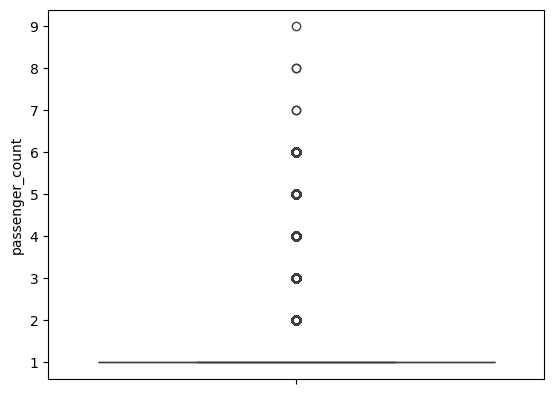

In [670]:
sns.boxplot(dfo['passenger_count'])

In [671]:
# classify trip_distance in every 10 percentile
dfo['trip_distance'].describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])


count    284424.000000
mean          3.567993
std          46.964556
min           0.000000
10%           0.650000
20%           0.910000
30%           1.190000
40%           1.460000
50%           1.800000
60%           2.200000
70%           2.880000
80%           4.220000
85%           5.850000
90%           9.060000
95%          15.300000
max       22528.820000
Name: trip_distance, dtype: float64

<Axes: ylabel='trip_distance'>

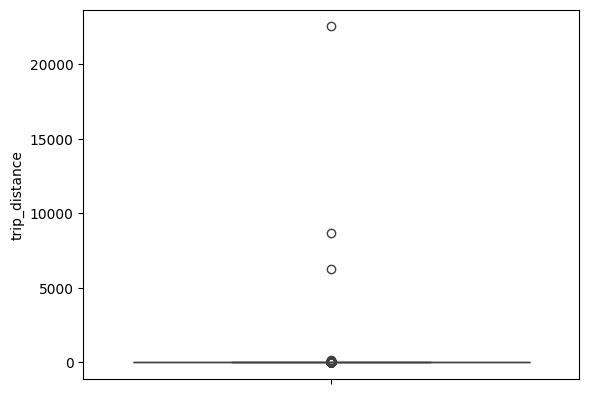

In [672]:
sns.boxplot(dfo['trip_distance'])

<Axes: ylabel='fare_amount'>

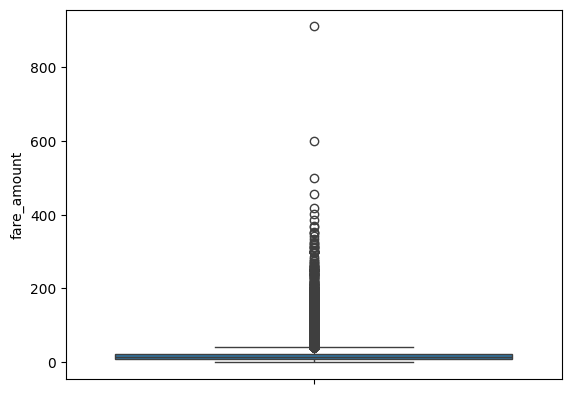

In [673]:
sns.boxplot(dfo['fare_amount'])

In [674]:
dfo['fare_amount'].describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])

count    284424.000000
mean         19.812769
std          18.201144
min           0.000000
10%           7.200000
20%           8.600000
30%          10.000000
40%          12.100000
50%          13.500000
60%          16.300000
70%          19.800000
80%          26.100000
85%          31.700000
90%          42.200000
95%          70.000000
max         910.000000
Name: fare_amount, dtype: float64

In [675]:
dfo.groupby('payment_type').size()

payment_type
0      9359
1    224047
2     47681
3      1297
4      2040
dtype: int64

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

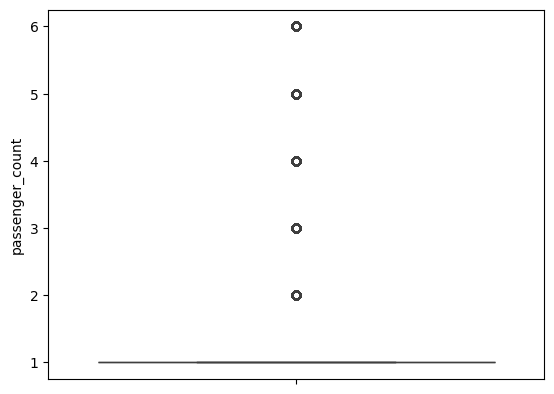

In [676]:
# remove passenger_count > 6
dfo= dfo[dfo['passenger_count']<=6]
sns.boxplot(dfo['passenger_count'])
plt.show()

In [677]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284419 entries, 0 to 284491
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               284419 non-null  int64  
 1   tpep_pickup_datetime   284419 non-null  object 
 2   tpep_dropoff_datetime  284419 non-null  object 
 3   passenger_count        284419 non-null  float64
 4   trip_distance          284419 non-null  float64
 5   RatecodeID             284419 non-null  float64
 6   store_and_fwd_flag     284419 non-null  object 
 7   PULocationID           284419 non-null  int64  
 8   DOLocationID           284419 non-null  int64  
 9   payment_type           284419 non-null  int64  
 10  fare_amount            284419 non-null  float64
 11  extra                  284419 non-null  float64
 12  mta_tax                284419 non-null  float64
 13  tip_amount             284419 non-null  float64
 14  tolls_amount           284419 non-null  f

In [678]:
dfo = dfo[((dfo['trip_distance'] >= 1) | (dfo['fare_amount'] <= 300))]

In [679]:
dfo.shape

(284413, 21)

In [680]:
dfo = dfo[dfo['trip_distance'] <= 250]

In [681]:
dfo.shape

(284410, 21)

In [682]:
dfo = dfo[~((dfo['trip_distance'] == 0) & (dfo['fare_amount'] == 0) & (dfo['PULocationID'] != dfo['DOLocationID']))]

In [683]:
dfo.shape

(284403, 21)

In [684]:
dfo['payment_type'].describe([0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])

count    284403.000000
mean          1.165343
std           0.505874
min           0.000000
5%            1.000000
10%           1.000000
20%           1.000000
30%           1.000000
40%           1.000000
50%           1.000000
60%           1.000000
70%           1.000000
80%           1.000000
85%           2.000000
90%           2.000000
95%           2.000000
max           4.000000
Name: payment_type, dtype: float64

In [685]:
dfo= dfo[dfo['payment_type']!=0]

In [686]:
# Do any columns need standardising?
dfo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 275047 entries, 1 to 284491
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               275047 non-null  int64  
 1   tpep_pickup_datetime   275047 non-null  object 
 2   tpep_dropoff_datetime  275047 non-null  object 
 3   passenger_count        275047 non-null  float64
 4   trip_distance          275047 non-null  float64
 5   RatecodeID             275047 non-null  float64
 6   store_and_fwd_flag     275047 non-null  object 
 7   PULocationID           275047 non-null  int64  
 8   DOLocationID           275047 non-null  int64  
 9   payment_type           275047 non-null  int64  
 10  fare_amount            275047 non-null  float64
 11  extra                  275047 non-null  float64
 12  mta_tax                275047 non-null  float64
 13  tip_amount             275047 non-null  float64
 14  tolls_amount           275047 non-null  f

In [687]:
dfo.shape

(275047, 21)

In [688]:
dataloss= ((284492-275047)/284492)*100
dataloss

3.319952757898289

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

In [689]:
dfo.tail(10)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
284481         1  2023-11-30 23:55:47   2023-12-01 00:05:21              1.0   
284482         2  2023-11-30 23:35:39   2023-11-30 23:55:42              2.0   
284483         2  2023-11-30 23:30:19   2023-11-30 23:37:08              1.0   
284484         2  2023-11-30 23:32:06   2023-11-30 23:36:20              1.0   
284485         2  2023-11-30 23:15:22   2023-11-30 23:43:31              3.0   
284486         2  2023-11-30 23:30:10   2023-11-30 23:53:57              1.0   
284488         2  2023-11-30 23:44:31   2023-12-01 00:02:25              1.0   
284489         2  2023-11-30 23:49:28   2023-12-01 00:20:29              2.0   
284490         2  2023-11-30 23:42:17   2023-11-30 23:54:19              1.0   
284491         2  2023-11-30 23:34:28   2023-11-30 23:46:37              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
284481           4.00         1.0                  N           170   
284482           8.49         1.0                  N           138   
284483           0.91         1.0                  N             4   
284484           0.80         1.0                  N           263   
284485           9.89         1.0                  N           230   
284486           4.90         1.0                  N           186   
284488           2.20         1.0                  N            48   
284489          18.13         2.0                  N           132   
284490           3.05         1.0                  N            68   
284491           2.02         1.0                  N           233   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
284481            45             1  ...    3.5      0.5        5.65   
284482           100             1  ...    6.0      0.5        6.00   
284483            79             1  ...    1.0      0.5        3.22   
284484           237             1  ...    1.0      0.5        1.08   
284485           223             1  ...    1.0      0.5       10.97   
284486            65             1  ...    1.0      0.5        5.58   
284488           141             1  ...    1.0      0.5        5.50   
284489            48             1  ...    0.0      0.5        7.00   
284490           163             2  ...    1.0      0.5        0.00   
284491           246             1  ...    1.0      0.5        2.00   

        tolls_amount  improvement_surcharge  total_amount  \
284481          0.00                    1.0         28.35   
284482          6.94                    1.0         60.59   
284483          0.00                    1.0         16.12   
284484          0.00                    1.0         11.88   
284485          6.94                    1.0         65.81   
284486          0.00                    1.0         36.68   
284488          0.00                    1.0         27.50   
284489          6.94                    1.0         89.69   
284490          0.00                    1.0         20.60   
284491          0.00                    1.0         20.50   

        congestion_surcharge  Airport_fee        date hour  
284481                   2.5         0.00  2023-11-30   23  
284482                   2.5         1.75  2023-11-30   23  
284483                   2.5         0.00  2023-11-30   23  
284484                   2.5         0.00  2023-11-30   23  
284485                   2.5         0.00  2023-11-30   23  
284486                   2.5         0.00  2023-11-30   23  
284488                   2.5         0.00  2023-11-30   23  
284489                   2.5         1.75  2023-11-30   23  
284490                   2.5         0.00  2023-11-30   23  
284491                   2.5         0.00  2023-11-30   23  

[10 rows x 21 columns]

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Categorical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`:Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra` : Numerical
* `mta_tax` : Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [690]:
# Convert to time
dfo['date'] = pd.to_datetime(dfo['date'])

In [691]:
dfo['day_in_week']= dfo['date'].dt.day_name()
hourly_trend = dfo.groupby('hour').size()
daily_trend = dfo.groupby('day_in_week').size()
monthly_trend = dfo.groupby(dfo['date'].dt.month).size()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trend = daily_trend.reindex(day_order)
dfo.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   
5         2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   
5           4.39         1.0                  N            79           263   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5       15.71          6.94   
3             4  ...      0.5        0.00          0.00   
4             1  ...      0.5        2.00          0.00   
5             1  ...      0.5        4.82          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   
5                    1.0         28.92                   2.5         0.00   

        date  hour day_in_week  
1 2023-09-01     0      Friday  
2 2023-09-01     0      Friday  
3 2023-09-01     0      Friday  
4 2023-09-01     0      Friday  
5 2023-09-01     0      Friday  

[5 rows x 22 columns]

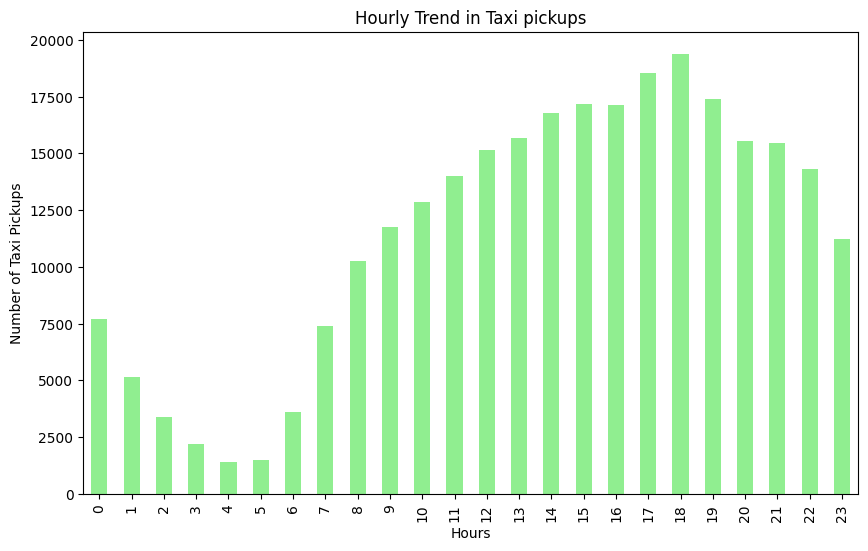

In [692]:
# Find and show the hourly trends in taxi pickups

plt.figure(figsize=(10, 6))
hourly_trend.plot(kind = 'bar', color = 'lightgreen')
plt.title('Hourly Trend in Taxi pickups')
plt.xlabel('Hours')
plt.ylabel('Number of Taxi Pickups')
plt.show()


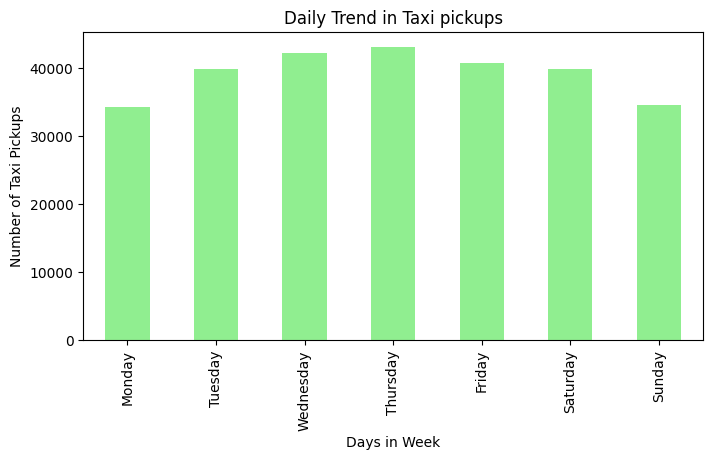

In [693]:
# Find and show the daily trends in taxi pickups (days of the week)
# dfo['day_of_week'] = dfo['date'].dt.weekday
plt.figure(figsize=(8, 4))
daily_trend.plot(kind = 'bar', color = 'lightgreen')
plt.title('Daily Trend in Taxi pickups')
plt.xlabel('Days in Week')
plt.ylabel('Number of Taxi Pickups')
plt.show()

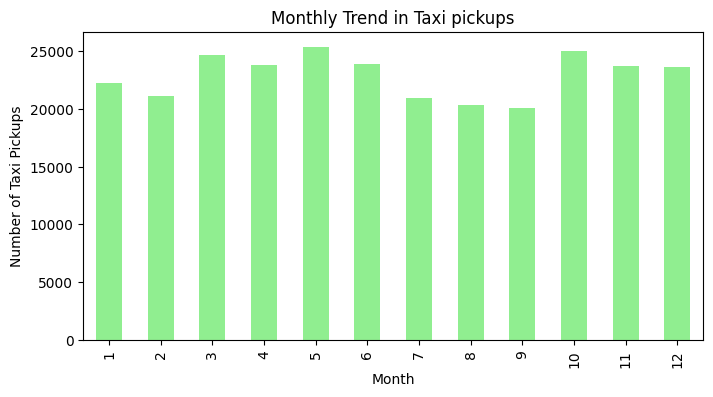

In [694]:
# Show the monthly trends in pickups
plt.figure(figsize=(8, 4))
monthly_trend.plot(kind = 'bar', color = 'lightgreen')
plt.title('Monthly Trend in Taxi pickups')
plt.xlabel('Month')
plt.ylabel('Number of Taxi Pickups')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [695]:
# Analyse the above parameters
dfo[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()


fare_amount     tip_amount   total_amount  trip_distance
count  275047.000000  275047.000000  275047.000000  275047.000000
mean       19.717743       3.572512      28.835235       3.439029
std        18.148604       4.066634      22.779212       4.531436
min         0.000000       0.000000       0.000000       0.000000
25%         9.300000       1.000000      15.960000       1.060000
50%        13.500000       2.860000      21.000000       1.790000
75%        21.900000       4.450000      30.620000       3.370000
max       455.200000     150.290000     488.700000     187.350000

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [696]:
# Create a df with non zero entries for the selected parameters.
df1 = dfo.copy()
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   
5         2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   
5           4.39         1.0                  N            79           263   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5       15.71          6.94   
3             4  ...      0.5        0.00          0.00   
4             1  ...      0.5        2.00          0.00   
5             1  ...      0.5        4.82          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   
5                    1.0         28.92                   2.5         0.00   

        date  hour day_in_week  
1 2023-09-01     0      Friday  
2 2023-09-01     0      Friday  
3 2023-09-01     0      Friday  
4 2023-09-01     0      Friday  
5 2023-09-01     0      Friday  

[5 rows x 22 columns]

In [697]:
df1= df1[df1['fare_amount']>0]

In [698]:
df1 = df1[df1['total_amount']>0]

In [699]:
df1[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()

fare_amount     tip_amount   total_amount  trip_distance
count  274959.000000  274959.000000  274959.000000  274959.000000
mean       19.724054       3.572648      28.842456       3.438835
std        18.148079       4.058599      22.777190       4.528790
min         0.010000       0.000000       1.010000       0.000000
25%         9.300000       1.000000      15.960000       1.060000
50%        13.500000       2.860000      21.000000       1.790000
75%        21.900000       4.450000      30.620000       3.370000
max       455.200000     150.290000     488.700000     187.350000

In [700]:
# Convert to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

In [701]:
df1[df1['tip_amount']==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1              2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
3              2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
9              2  2023-09-01 00:04:45   2023-09-01 00:13:42              1.0   
12             1  2023-09-01 00:09:36   2023-09-01 00:19:47              1.0   
13             2  2023-09-01 00:15:18   2023-09-01 00:45:58              1.0   
...          ...                  ...                   ...              ...   
284472         2  2023-11-30 23:41:12   2023-11-30 23:53:24              2.0   
284476         1  2023-11-30 23:35:11   2023-11-30 23:55:12              1.0   
284478         2  2023-11-30 23:15:17   2023-11-30 23:24:38              1.0   
284480         2  2023-11-30 23:49:46   2023-11-30 23:58:22              5.0   
284490         2  2023-11-30 23:42:17   2023-11-30 23:54:19              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1                0.56         1.0                  N           142   
3               13.71         1.0                  N           249   
9                2.17         1.0                  N           230   
12               1.50         1.0                  N           236   
13               8.07         1.0                  N           161   
...               ...         ...                ...           ...   
284472           1.80         1.0                  N           107   
284476           6.20         1.0                  N           170   
284478           1.51         1.0                  N           261   
284480           1.35         1.0                  N           144   
284490           3.05         1.0                  N            68   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1                142             2  ...      0.5         0.0          0.00   
3                180             4  ...      0.5         0.0          0.00   
9                239             2  ...      0.5         0.0          0.00   
12               229             2  ...      0.5         0.0          0.00   
13                37             2  ...      0.5         0.0          6.94   
...              ...           ...  ...      ...         ...           ...   
284472           161             2  ...      0.5         0.0          0.00   
284476           256             1  ...      0.5         0.0          0.00   
284478           231             2  ...      0.5         0.0          0.00   
284480           232             2  ...      0.5         0.0          0.00   
284490           163             2  ...      0.5         0.0          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
1                         1.0         10.10                   2.5   
3                         1.0         64.70                   2.5   
9                         1.0         17.10                   2.5   
12                        1.0         15.00                   2.5   
13                        1.0         50.64                   2.5   
...                       ...           ...                   ...   
284472                    1.0         17.80                   2.5   
284476                    1.0         34.60                   2.5   
284478                    1.0         16.40                   2.5   
284480                    1.0         15.00                   2.5   
284490                    1.0         20.60                   2.5   

        Airport_fee       date  hour day_in_week  
1               0.0 2023-09-01     0      Friday  
3               0.0 2023-09-01     0      Friday  
9               0.0 2023-09-01     0      Friday  
12              0.0 2023-09-01     0      Friday  
13              0.0 2023-09-01     0      Friday  
...             ...        ...   ...         ...  
284472          0.0 2023-11-30    23    Thursday  
284476          0.0 2023-11-30  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [702]:
# Group data by month and analyse monthly revenue
df_monthly_revenue =df1.groupby(df1['date'].dt.month)['total_amount'].sum()
df_monthly_revenue.sort_values(ascending=False)

date
10    748014.59
5     745403.01
6     699893.60
3     695473.66
11    685690.76
12    685610.71
4     680216.07
1     611451.85
9     606778.97
7     603424.74
8     589861.33
2     578673.70
Name: total_amount, dtype: float64

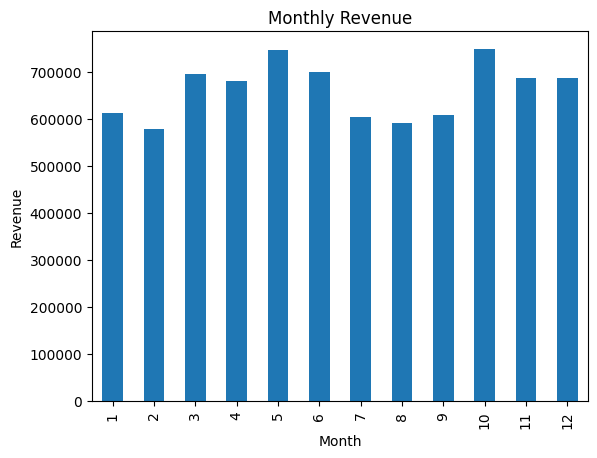

In [703]:
#plot barchart of df_monthly_revenue
df_monthly_revenue.plot.bar()
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [704]:
# Calculate proportion of each quarter
df_quarterly_revenue =df1.groupby(df1['date'].dt.quarter)['total_amount'].sum()
df_quarterly_revenue.sort_values(ascending=False)

date
2    2125512.68
4    2119316.06
1    1885599.21
3    1800065.04
Name: total_amount, dtype: float64

In [705]:
df_quarterly_revenue.sum()

7930492.99

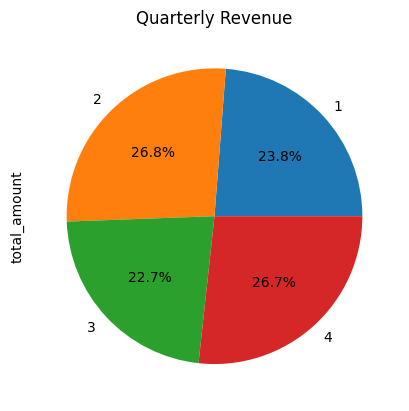

In [706]:
df_quarterly_revenue.plot.pie(autopct='%1.1f%%')
plt.title('Quarterly Revenue')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

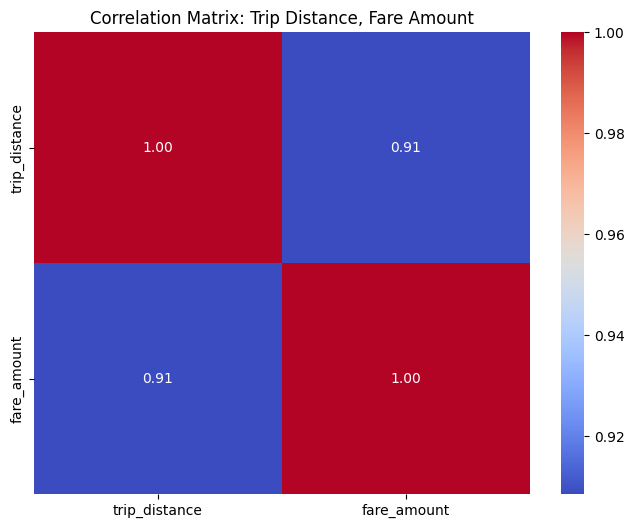

In [707]:
correlation_matrix = df1[['trip_distance', 'fare_amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Trip Distance, Fare Amount")
plt.show()

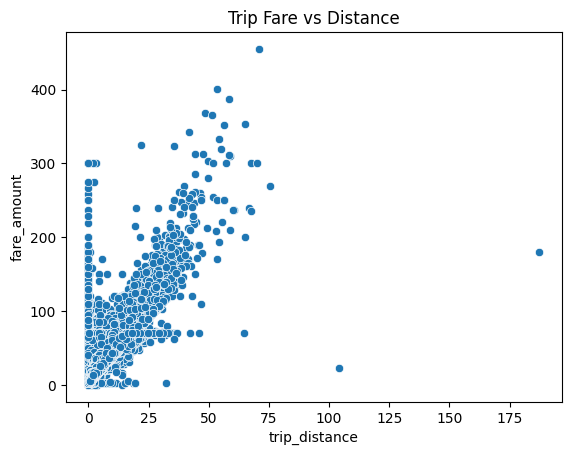

In [708]:
# Show how trip fare is affected by distance
sns.scatterplot(x='trip_distance', y='fare_amount', data=df1)
plt.title('Trip Fare vs Distance')
plt.show()


In [709]:
#cooreltion value between trip_distance and fare_amount
#df1[['trip_distance', 'fare_amount']].corr()
corelation_value = round(df1['trip_distance'].corr(df1['fare_amount']),2)
corelation_value

0.91

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [710]:
df1['trip_duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60
df1['trip_duration'].describe()

count    274959.000000
mean         17.274564
std          40.615252
min         -52.750000
25%           7.600000
50%          12.550000
75%          20.450000
max        5411.000000
Name: trip_duration, dtype: float64

In [711]:
df1[df1['trip_duration']==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
980            2  2023-09-02 16:20:20   2023-09-02 16:20:20              6.0   
5215           1  2023-09-08 11:06:28   2023-09-08 11:06:28              1.0   
5504           1  2023-09-08 16:49:17   2023-09-08 16:49:17              1.0   
7093           2  2023-09-10 12:55:27   2023-09-10 12:55:27              2.0   
8427           1  2023-09-12 07:58:12   2023-09-12 07:58:12              1.0   
...          ...                  ...                   ...              ...   
268964         1  2023-11-11 12:40:59   2023-11-11 12:40:59              2.0   
273603         1  2023-11-16 18:51:47   2023-11-16 18:51:47              2.0   
276679         1  2023-11-20 10:24:13   2023-11-20 10:24:13              1.0   
282985         2  2023-11-28 13:22:42   2023-11-28 13:22:42              1.0   
284074         2  2023-11-30 17:48:11   2023-11-30 17:48:11              6.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
980              0.00         1.0                  N           193   
5215             0.60         1.0                  N           237   
5504             0.00         1.0                  Y           232   
7093             0.00         5.0                  N           229   
8427             0.00         2.0                  Y           132   
...               ...         ...                ...           ...   
268964           0.00         1.0                  N            79   
273603           0.00         1.0                  N            88   
276679           0.00         1.0                  Y           262   
282985           0.05         5.0                  N           264   
284074           0.00         5.0                  N           264   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
980              237             2  ...         0.0           0.0   
5215             237             1  ...         2.2           0.0   
5504             264             2  ...         0.0           0.0   
7093             264             1  ...        16.4           0.0   
8427             264             2  ...         0.0           0.0   
...              ...           ...  ...         ...           ...   
268964           264             2  ...         0.0           0.0   
273603           264             2  ...         0.0           0.0   
276679           264             2  ...         0.0           0.0   
282985           264             1  ...        16.6           0.0   
284074           264             1  ...        21.9           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
980                       1.0          4.50                   0.0   
5215                      1.0         13.40                   2.5   
5504                      0.0         33.37                   0.0   
7093                      0.0         98.40                   0.0   
8427                      1.0         73.25                   0.0   
...                       ...           ...                   ...   
268964                    1.0          7.00                   2.5   
273603                    1.0         37.50                   2.5   
276679                    1.0         21.70                   2.5   
282985                    0.0         99.60                   0.0   
284074                    0.0        109.50                   0.0   

        Airport_fee       date  hour  day_in_week trip_duration  
980            0.00 2023-09-02    16     Saturday           0.0  
5215           0.00 2023-09-08    11       Friday           0.0  
5504           0.00 2023-09-08    16       Friday           0.0  
7093           0.00 2023-09-10    12       Sunday           0.0  
8427           1.75 2023-09-12     7      Tuesday           0.0  
...             ...        ...   ...          ...           ...  
268964         0.00 2023-11-11    12     Saturday           0.0  
273603         0.00 

In [712]:
df1 = df1[df1['trip_duration']>0]

In [713]:
df1['trip_duration'].describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])

count    274844.000000
mean         17.283131
std          40.620956
min           0.016667
10%           4.766667
20%           6.700000
30%           8.516667
40%          10.433333
50%          12.550000
60%          15.116667
70%          18.366667
80%          23.116667
85%          26.766667
90%          32.266667
95%          42.766667
max        5411.000000
Name: trip_duration, dtype: float64

In [714]:
df1 = df1[df1['trip_duration']<50]

<Axes: ylabel='trip_duration'>

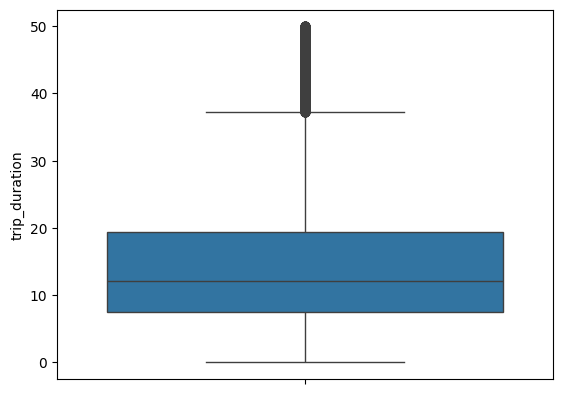

In [715]:
sns.boxplot(df1['trip_duration'])

In [716]:
df1 = df1[df1['trip_duration']<50]

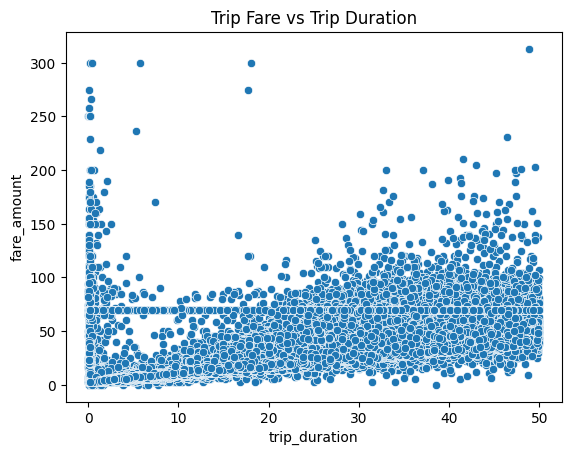

In [717]:
# Show relationship between fare and trip duration
sns.scatterplot(x='trip_duration', y='fare_amount', data=df1)
plt.title('Trip Fare vs Trip Duration')
plt.show()


In [718]:
# Show relationship between fare and number of passengers
passenger_avgfare = df1.groupby('passenger_count')['fare_amount'].mean()
passenger_avgfare

passenger_count
1.0    17.616584
2.0    19.787985
3.0    19.346392
4.0    20.739085
5.0    17.525741
6.0    17.340259
Name: fare_amount, dtype: float64

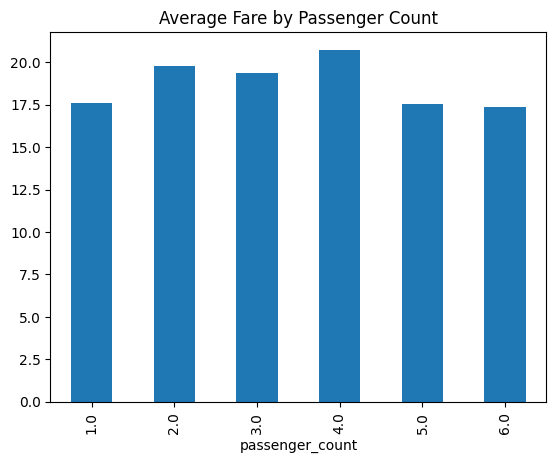

In [719]:
passenger_avgfare.plot.bar()
plt.title('Average Fare by Passenger Count')
plt.show()

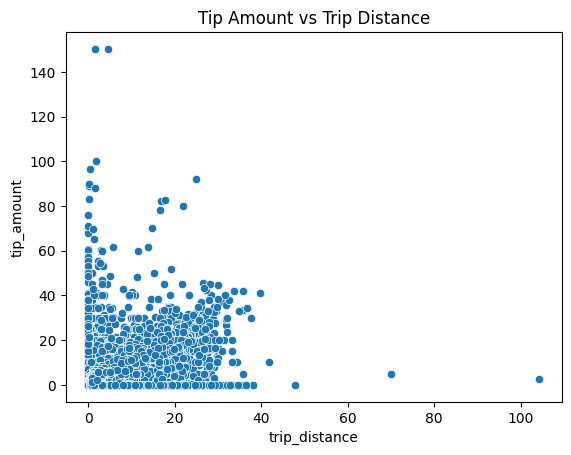

In [720]:
# Show relationship between tip and trip distance
sns.scatterplot(x='trip_distance', y='tip_amount', data=df1)
plt.title('Tip Amount vs Trip Distance')
plt.show()


In [721]:
df1[df1['trip_distance']> 100]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
255440         2  2023-08-25 14:29:44   2023-08-25 14:54:07              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
255440          104.3         1.0                  N            43   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
255440           170             1  ...        2.73           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
255440                    1.0         30.03                   2.5   

        Airport_fee       date  hour  day_in_week trip_duration  
255440          0.0 2023-08-25    14       Friday     24.383333  

[1 rows x 23 columns]

In [722]:
df1 = df1[df1['trip_distance']<100]

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [723]:
# Analyse the distribution of different payment types (payment_type).
df1.groupby('payment_type').size()



payment_type
1    217062
2     45766
3      1246
4      1969
dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [725]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/ColabNotebooks/NYCZONES/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

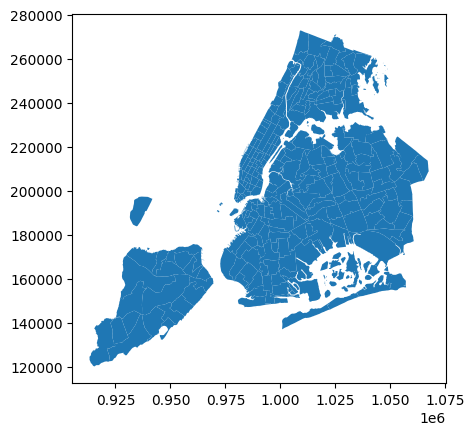

In [726]:
# print(zones.info())
# zones.plot()
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [727]:
# Merge zones and trip records using locationID and PULocationID
dfnew = df1.merge(zones, left_on='PULocationID', right_on='LocationID')
dfnew.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
1         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
2         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
3         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   
4         2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.56         1.0                  N           142           142   
1          18.46         2.0                  N           132           163   
2          13.71         1.0                  N           249           180   
3           0.71         1.0                  N           144           232   
4           4.39         1.0                  N            79           263   

   payment_type  ...  hour  day_in_week  trip_duration  OBJECTID  Shape_Leng  \
0             2  ...     0       Friday       2.483333       142    0.038176   
1             1  ...     0       Friday      44.583333       132    0.245479   
2             4  ...     0       Friday      38.116667       249    0.036384   
3             1  ...     0       Friday       6.300000       144    0.027620   
4             1  ...     0       Friday      13.416667        79    0.042625   

   Shape_Area                 zone  LocationID    borough  \
0    0.000076  Lincoln Square East         142  Manhattan   
1    0.002038          JFK Airport         132     Queens   
2    0.000072         West Village         249  Manhattan   
3    0.000047  Little Italy/NoLiTa         144  Manhattan   
4    0.000108         East Village          79  Manhattan   

                                            geometry  
0  POLYGON ((989380.305 218980.247, 989359.803 21...  
1  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
2  POLYGON ((983555.319 204876.901, 983469.158 20...  
3  POLYGON ((985411.76 200369.518, 985342.573 200...  
4  POLYGON ((988746.067 202151.955, 988733.885 20...  

[5 rows x 30 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [728]:
# Group data by location and calculate the number of trips
locn_trips = dfnew.groupby('LocationID').size()
locn_trips

LocationID
1        39
3         7
4       269
6         3
7       118
       ... 
259       2
260      48
261    1395
262    3481
263    5213
Length: 235, dtype: int64

In [729]:
# rename PULocation INDEX in locn_trips
locn_trips = locn_trips.rename('total_trips')
locn_trips

LocationID
1        39
3         7
4       269
6         3
7       118
       ... 
259       2
260      48
261    1395
262    3481
263    5213
Name: total_trips, Length: 235, dtype: int64

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [730]:
# Merge loc_trip trip counts back to the zones GeoDataFrame
zone_map = zones.merge(locn_trips, left_on='LocationID', right_on='LocationID')
zone_map.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
2         4    0.043567    0.000112            Alphabet City           4   
3         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
4         7    0.107417    0.000390                  Astoria           7   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
2      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
3  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   
4         Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...   

   total_trips  
0           39  
1            7  
2          269  
3            3  
4          118

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

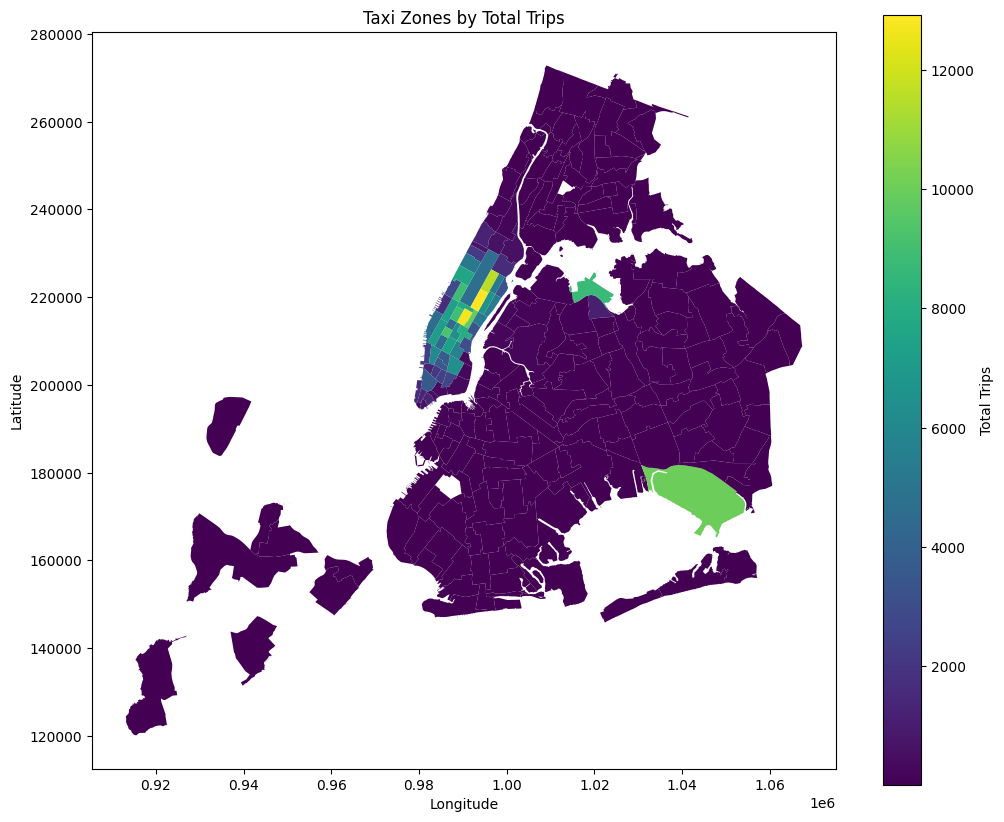

In [732]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zone_map.plot(column='total_trips', ax=ax, legend=True, legend_kwds={'label': "Total Trips", 'orientation': "vertical"})
plt.title('Taxi Zones by Total Trips')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [504]:
# can you try displaying the zones DF sorted by the number of trips?
zone_map.sort_values(by='total_trips', ascending=False)


OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
210       237    0.042213    0.000096      Upper East Side South         237   
142       161    0.035804    0.000072             Midtown Center         161   
209       236    0.044252    0.000103      Upper East Side North         236   
114       132    0.245479    0.002038                JFK Airport         132   
143       162    0.035270    0.000048               Midtown East         162   
..        ...         ...         ...                        ...         ...   
64         73    0.085302    0.000292              East Flushing          73   
110       128    0.070209    0.000207           Inwood Hill Park         128   
200       227    0.082830    0.000268           Sunset Park East         227   
95        109    0.178268    0.001170                Great Kills         109   
86         96    0.185180    0.000548  Forest Park/Highland Park          96   

           borough                                           geometry  \
210      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
142      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
209      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
114         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
143      Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
..             ...                                                ...   
64          Queens  POLYGON ((1040865.308 212673.974, 1040649.312 ...   
110      Manhattan  MULTIPOLYGON (((1005378.119 259493.528, 100537...   
200       Brooklyn  POLYGON ((986490.117 173249.044, 986291.305 17...   
95   Staten Island  POLYGON ((943392.585 147162.426, 943412.636 14...   
86          Queens  POLYGON ((1029152.314 197379.274, 1029238.052 ...   

     total_trips  
210        12917  
142        12681  
209        11570  
114         9992  
143         9863  
..           ...  
64             1  
110            1  
200            1  
95             1  
86             1  

[236 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

In [505]:
dfnew['trip_duration_hr']=dfnew['trip_duration']/60

In [506]:
dfnew['speed'] = dfnew['trip_distance'] / dfnew['trip_duration_hr']

In [508]:
# 1. Group by Route and Hour
route_hour_groups = dfnew.groupby(['PULocationID', 'DOLocationID', 'hour'])

# 2. Calculate Average Trip Duration and Include trip_distance
avg_trip_duration = route_hour_groups[['trip_duration', 'trip_distance']].mean().reset_index()

# 3. Calculate Route Speed
# Convert trip_duration to hours for speed calculation
avg_trip_duration['trip_duration_hr'] = avg_trip_duration['trip_duration'] / 60
avg_trip_duration['speed'] = avg_trip_duration['trip_distance'] / avg_trip_duration['trip_duration_hr']

# 4. Identify Slow Routes (e.g., find the 10 slowest routes)
slowest_routes = avg_trip_duration.sort_values(by='speed').head(10)

print(slowest_routes)

       PULocationID  DOLocationID  hour  trip_duration  trip_distance  \
0                 1             1     5       0.241667            0.0   
55106           244           244     7       3.816667            0.0   
31229           148           170    13      13.583333            0.0   
48266           232           232    23       1.683333            0.0   
57447           249           257    21      24.733333            0.0   
42712           209           209    20       0.083333            0.0   
42713           209           209    21       0.266667            0.0   
42714           209           209    22       0.233333            0.0   
8600             74           182    21      18.733333            0.0   
55040           244            79    15      45.433333            0.0   

       trip_duration_hr  speed  
0              0.004028    0.0  
55106          0.063611    0.0  
31229          0.226389    0.0  
48266          0.028056    0.0  
57447          0.412222    0.0 

In [510]:
dfnew.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
1         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
2         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
3         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   
4         2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.56         1.0                  N           142           142   
1          18.46         2.0                  N           132           163   
2          13.71         1.0                  N           249           180   
3           0.71         1.0                  N           144           232   
4           4.39         1.0                  N            79           263   

   payment_type  ...  trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0             2  ...       2.483333       142    0.038176    0.000076   
1             1  ...      44.583333       132    0.245479    0.002038   
2             4  ...      38.116667       249    0.036384    0.000072   
3             1  ...       6.300000       144    0.027620    0.000047   
4             1  ...      13.416667        79    0.042625    0.000108   

                  zone  LocationID    borough  \
0  Lincoln Square East         142  Manhattan   
1          JFK Airport         132     Queens   
2         West Village         249  Manhattan   
3  Little Italy/NoLiTa         144  Manhattan   
4         East Village          79  Manhattan   

                                            geometry  trip_duration_hr  \
0  POLYGON ((989380.305 218980.247, 989359.803 21...          0.041389   
1  MULTIPOLYGON (((1032791.001 181085.006, 103283...          0.743056   
2  POLYGON ((983555.319 204876.901, 983469.158 20...          0.635278   
3  POLYGON ((985411.76 200369.518, 985342.573 200...          0.105000   
4  POLYGON ((988746.067 202151.955, 988733.885 20...          0.223611   

       speed  
0  13.530201  
1  24.843364  
2  21.581111  
3   6.761905  
4  19.632298  

[5 rows x 32 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [512]:
trips_hourly = dfnew.groupby('hour').size()
trips_hourly.sort_values(ascending=False)

hour
18    18664
17    17428
19    16933
15    15836
16    15827
14    15628
20    15241
21    15189
13    14776
12    14512
22    14008
11    13446
10    12401
9     11331
23    11014
8      9817
0      7547
7      6985
1      5051
6      3433
2      3315
3      2171
5      1457
4      1395
dtype: int64

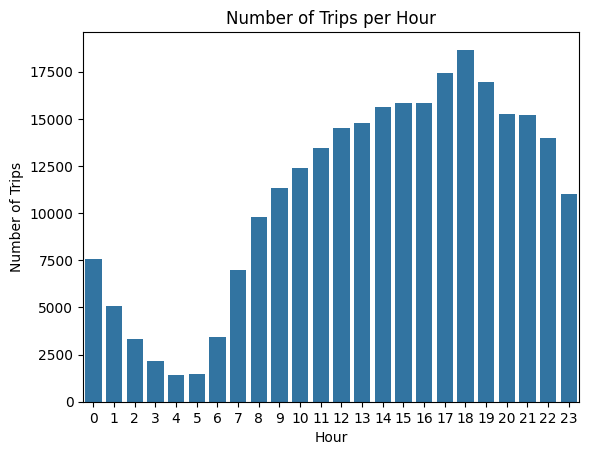

Busiest hour: 18 hr with 18664 trips


In [513]:
# Visualise the number of trips per hour and find the busiest hour
sns.barplot(x=dfnew['hour'].value_counts().index, y=dfnew['hour'].value_counts())
plt.title('Number of Trips per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

print('Busiest hour:', dfnew['hour'].value_counts().idxmax(), 'hr with', dfnew['hour'].value_counts().max(), 'trips')

In [514]:
five_busiest_hr = dfnew['hour'].value_counts().sort_values(ascending=False).head(5)
five_busiest_hr

hour
18    18664
17    17428
19    16933
15    15836
16    15827
Name: count, dtype: int64

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [515]:
# Scale up the number of trips


# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.0075
actual_trip_counts = five_busiest_hr / sample_fraction
actual_trip_counts


hour
18    2.488533e+06
17    2.323733e+06
19    2.257733e+06
15    2.111467e+06
16    2.110267e+06
Name: count, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [516]:
dfnew.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'date', 'hour',
       'day_in_week', 'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'zone', 'LocationID', 'borough', 'geometry', 'trip_duration_hr',
       'speed'],
      dtype='object')

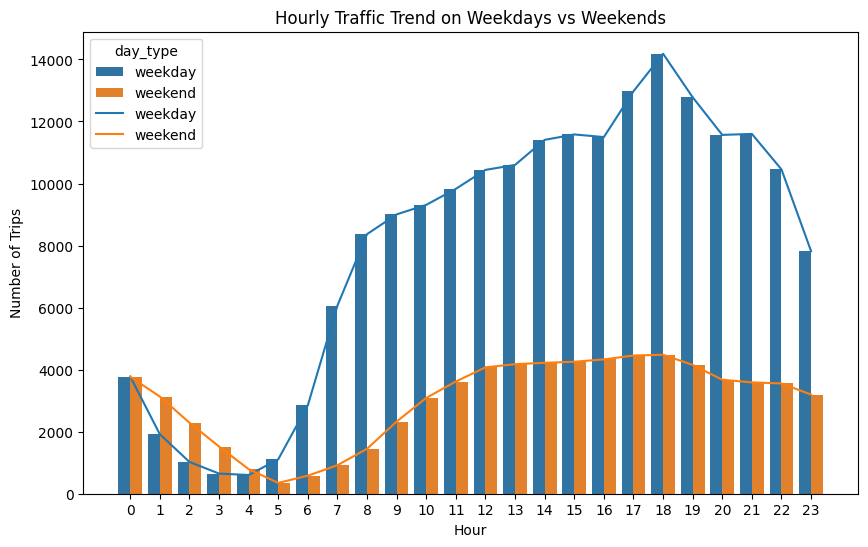

In [517]:
# Compare traffic trends for the week days and weekends
dfnew['day_type']= dfnew['day_in_week'].apply(lambda x: 'weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'weekend')

week_traffic_trend = dfnew.groupby(['hour', 'day_type'])['hour'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=week_traffic_trend.index.get_level_values('hour'), y=week_traffic_trend.values, hue=week_traffic_trend.index.get_level_values('day_type'))
sns.lineplot(x=week_traffic_trend.index.get_level_values('hour'), y=week_traffic_trend.values, hue=week_traffic_trend.index.get_level_values('day_type'))
plt.title('Hourly Traffic Trend on Weekdays vs Weekends')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [550]:
# Find top 10 pickup and dropoff zones
# 1. Group by zone and hour, calculate the sum of PULocationID
sum_PULocationID_by_zone_hour = dfnew.groupby(['zone', 'hour'])['PULocationID'].sum().reset_index(name='sum_PULocationID')

# 2. Find the maximum sum of PULocationID for each zone across all hours
max_sum_PULocationID_by_zone = sum_PULocationID_by_zone_hour.loc[sum_PULocationID_by_zone_hour.groupby('zone')['sum_PULocationID'].idxmax()]

# Display the pickup results
max_sum_PULocationID_by_zone.sort_values(by='sum_PULocationID', ascending=False).head(10)


zone  hour  sum_PULocationID
2631      Upper East Side South    15            233919
2607      Upper East Side North    15            229392
1762             Midtown Center    18            180320
2483  Times Sq/Theatre District    22            151340
1786               Midtown East    18            142398
2576                   Union Sq    19            139932
2800               West Village    21            132219
2681      Upper West Side South    17            131450
1304                JFK Airport    22            118272
1810              Midtown North    18            117360

In [551]:
# 1. Group by zone and hour, calculate the sum of DOLocationID
sum_DOLocationID_by_zone_hour = dfnew.groupby(['zone', 'hour'])['DOLocationID'].sum().reset_index(name='sum_DOLocationID')

# 2. Find the maximum sum of DOLocationID for each zone across all hours
max_sum_DOLocationID_by_zone = sum_DOLocationID_by_zone_hour.loc[sum_DOLocationID_by_zone_hour.groupby('zone')['sum_DOLocationID'].idxmax()]

# Display the drop off results
max_sum_DOLocationID_by_zone.sort_values(by='sum_DOLocationID', ascending=False).head(10)


zone  hour  sum_DOLocationID
1762             Midtown Center    18            197235
2631      Upper East Side South    15            185408
2607      Upper East Side North    15            182330
1786               Midtown East    18            148437
1304                JFK Airport    22            129262
1810              Midtown North    18            125342
1500        Lincoln Square East    21            120804
2479  Times Sq/Theatre District    18            109450
1916                Murray Hill    18            106831
1418          LaGuardia Airport    14            102170

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [566]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickdrop = dfnew.groupby('zone')[['PULocationID', 'DOLocationID']].sum()
pickdrop['pickup_dropoff_ratio'] = pickdrop['PULocationID'] / pickdrop['DOLocationID']
pickdrop.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

PULocationID  DOLocationID  \
zone                                                              
Westerleigh                                   251            23   
Rockaway Park                                 201            22   
Marine Park/Floyd Bennett Field               154            21   
Ocean Parkway South                           178            29   
Midwood                                       330            75   
Willets Point                                 253            81   
Marble Hill                                   306           125   
Whitestone                                    504           213   
Van Nest/Morris Park                         3388          1827   
Riverdale/North Riverdale/Fieldston           800           439   

                                     pickup_dropoff_ratio  
zone                                                       
Westerleigh                                     10.913043  
Rockaway Park                                    9.136364  
Marine Park/Floyd Bennett Field                  7.333333  
Ocean Parkway South                              6.137931  
Midwood                                          4.400000  
Willets Point                                    3.123457  
Marble Hill                                      2.448000  
Whitestone                                       2.366197  
Van Nest/Morris Park                             1.854406  
Riverdale/North Riverdale/Fieldston              1.822323

In [569]:
pickdrop.sort_values(by='pickup_dropoff_ratio', ascending=False).tail(10)

PULocationID  DOLocationID  pickup_dropoff_ratio
zone                                                                     
Battery Park City               19942        240839              0.082802
Battery Park                     1428         18233              0.078320
Baisley Park                      630          8678              0.072597
Bay Terrace/Fort Totten            45           624              0.072115
Bath Beach                         44           613              0.071778
Newark Airport                     39           566              0.068905
Astoria                           826         16320              0.050613
Auburndale                         27           556              0.048561
Allerton/Pelham Gardens            21           737              0.028494
Alphabet City                    1076         39451              0.027274

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



In [733]:
# Assuming your DataFrame is called 'dfnew' and has 'PULocationID', 'DOLocationID', and 'hour' columns

# 1. Filter Data for Night Hours:
night_hours_data = dfnew[(dfnew['hour'] >= 23) | (dfnew['hour'] <= 5)]

# 2. Calculate Pickup and Dropoff Counts for Night Hours:
night_pickup_counts = night_hours_data.groupby('PULocationID')['PULocationID'].count().rename('night_pickup_count')
night_dropoff_counts = night_hours_data.groupby('DOLocationID')['DOLocationID'].count().rename('night_dropoff_count')

# 3. Merge Pickup and Dropoff Counts:
night_zone_counts = pd.merge(night_pickup_counts, night_dropoff_counts, left_index=True, right_index=True, how='outer')

# 4. Identify Zones with High Traffic:
# You can set a threshold for "high traffic" based on your data and analysis goals.
# For example, you could select zones with more than 100 pickups and 100 dropoffs during night hours.
high_traffic_zones = night_zone_counts[(night_zone_counts['night_pickup_count'] > 100) & (night_zone_counts['night_dropoff_count'] > 100)].sort_values(by='night_pickup_count', ascending=False)

# 5. Display the Results:
print("Zones with High Pickup and Dropoff Traffic During Night Hours:\n", high_traffic_zones)

Zones with High Pickup and Dropoff Traffic During Night Hours:
      night_pickup_count  night_dropoff_count
79               2338.0               1267.0
132              2074.0                278.0
249              1903.0                704.0
48               1534.0               1038.0
148              1457.0                667.0
230              1279.0                654.0
114              1279.0                373.0
186              1041.0                585.0
138               934.0                299.0
164               899.0                592.0
107               877.0                876.0
68                876.0                896.0
161               861.0                441.0
234               806.0                543.0
142               741.0                555.0
90                729.0                681.0
144               691.0                402.0
163               681.0                498.0
162               633.0                541.0
246               624.0             

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



In [573]:
# 1. Define Nighttime and Daytime Hours (11 PM to 5 AM as Nighttime):
dfnew['hour'] = pd.to_datetime(dfnew['tpep_pickup_datetime']).dt.hour  # Extract hour from pickup datetime
dfnew['time_of_day'] = pd.cut(dfnew['hour'],
                              bins=[0, 5, 6, 23],  # Define bins for nighttime (0-5), daytime (6-23)
                              labels=['Nighttime', 'Daytime', 'Daytime_2'], # provide unique label for each bin
                              include_lowest=True,
                              ordered=False # Pass ordered=False to allow for duplicate labels. This creates unordered categories.
                              )

# 2. Calculate Total Revenue:
total_revenue = dfnew['total_amount'].sum()

# 3. Calculate Revenue for Nighttime and Daytime:
nighttime_revenue = dfnew[dfnew['time_of_day'] == 'Nighttime']['total_amount'].sum()
daytime_revenue = dfnew[dfnew['time_of_day'] == 'Daytime']['total_amount'].sum() + dfnew[dfnew['time_of_day'] == 'Daytime_2']['total_amount'].sum() # Sum revenue for both daytime labels

# 4. Calculate Revenue Share:
nighttime_share = (nighttime_revenue / total_revenue) * 100
daytime_share = (daytime_revenue / total_revenue) * 100

# 5. Display the Results:
print(f"Nighttime Revenue Share (11 PM to 5 AM): {nighttime_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_share:.2f}%")

Nighttime Revenue Share (11 PM to 5 AM): 8.48%
Daytime Revenue Share: 91.52%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [577]:
# Analyse the fare per mile per passenger for different passenger counts
dfnew['fare_per_mile'] = dfnew.apply(lambda row: row['fare_amount'] / row['trip_distance'] if row['trip_distance'] != 0 else 0, axis=1)

# Calculate fare per mile per passenger, handling zero passengers
dfnew['fare_per_mile_per_passenger'] = dfnew.apply(lambda row: row['fare_per_mile'] / row['passenger_count'] if row['passenger_count'] != 0 else 0, axis=1)

# Group by passenger count and calculate average fare per mile per passenger
avg_fare_per_mile_per_passenger = dfnew.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

avg_fare_per_mile_per_passenger



passenger_count
1.0    10.592920
2.0     6.442915
3.0     4.394325
4.0     4.310938
5.0     1.595525
6.0     1.292722
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



In [580]:

# Calculate fare per mile, handling zero distances
dfnew['fare_per_mile'] = dfnew.apply(lambda row: row['fare_amount'] / row['trip_distance'] if row['trip_distance'] != 0 else 0, axis=1)

# Group by hour of the day and calculate average fare per mile
avg_fare_per_mile_by_hour = dfnew.groupby(dfnew['tpep_pickup_datetime'].dt.hour)['fare_per_mile'].mean()

print("Average Fare per Mile by Hour of the Day:\n", avg_fare_per_mile_by_hour)

Average Fare per Mile by Hour of the Day:
 tpep_pickup_datetime
0     11.748899
1     11.565088
2      8.867934
3      9.190636
4     15.542392
5     11.890736
6     12.950294
7      8.728871
8      9.684526
9      9.502832
10    10.527527
11    10.928139
12    11.662197
13    12.798107
14    12.097599
15    10.892511
16    14.347712
17    12.294174
18    10.297897
19    11.771582
20     9.403914
21     9.075479
22    11.897686
23     9.397087
Name: fare_per_mile, dtype: float64


In [581]:
# Group by day of the week and calculate average fare per mile
avg_fare_per_mile_by_day = dfnew.groupby(dfnew['tpep_pickup_datetime'].dt.day_name())['fare_per_mile'].mean()

print("\nAverage Fare per Mile by Day of the Week:\n", avg_fare_per_mile_by_day)


Average Fare per Mile by Day of the Week:
 tpep_pickup_datetime
Friday        9.769773
Monday       10.306885
Saturday     11.092537
Sunday       11.777078
Thursday     12.425331
Tuesday      10.661049
Wednesday    11.576987
Name: fare_per_mile, dtype: float64


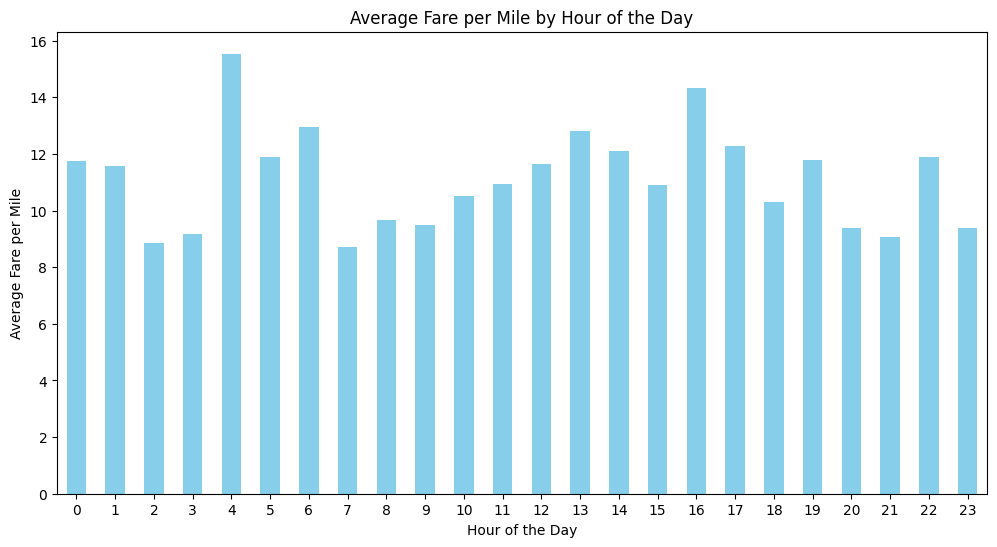

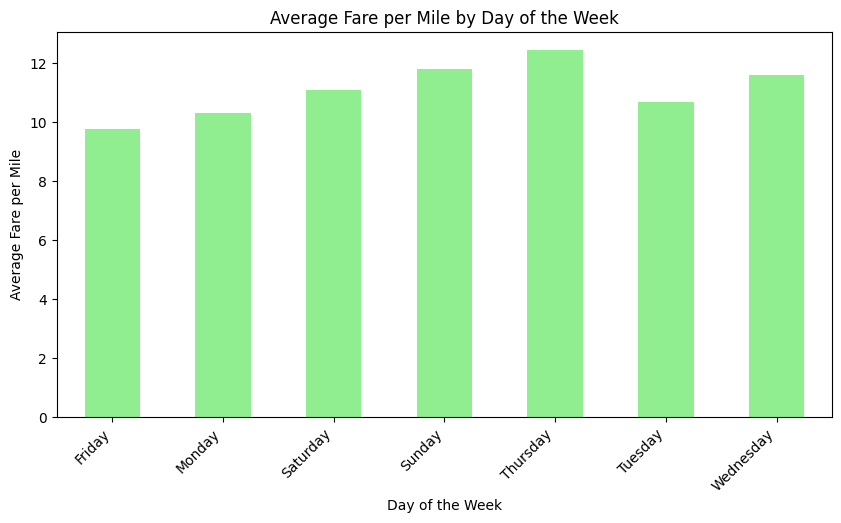

In [582]:
# Plotting average fare per mile by hour of the day
plt.figure(figsize=(12, 6))
avg_fare_per_mile_by_hour.plot(kind='bar', color='skyblue')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=0)
plt.show()

# Plotting average fare per mile by day of the week
plt.figure(figsize=(10, 5))
avg_fare_per_mile_by_day.plot(kind='bar', color='lightgreen')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



In [591]:
# Calculate fare per mile, handling zero distances
dfnew['fare_per_mile'] = dfnew.apply(lambda row: row['fare_amount'] / row['trip_distance'] if row['trip_distance'] != 0 else 0, axis=1)

# Group by vendor and hour of the day, calculate average fare per mile
avg_fare_by_vendor_hour = dfnew.groupby(['VendorID','hour'])['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor and Hour of the Day:\n", avg_fare_by_vendor_hour)

Average Fare per Mile by Vendor and Hour of the Day:
     VendorID  hour  fare_per_mile
0          1     0       6.514436
1          1     1       7.065316
2          1     2       7.061507
3          1     3       6.216613
4          1     4       5.703022
5          1     5       6.528741
6          1     6       6.529191
7          1     7       7.283374
8          1     8       8.162886
9          1     9       8.019152
10         1    10       8.127143
11         1    11       8.448732
12         1    12       8.715208
13         1    13       8.519690
14         1    14       8.925118
15         1    15       8.693788
16         1    16       8.840922
17         1    17       8.600760
18         1    18       8.356178
19         1    19       8.110053
20         1    20       7.275004
21         1    21       7.146577
22         1    22       6.906607
23         1    23       6.702293
24         2     0      13.307986
25         2     1      12.814962
26         2     2       9.4

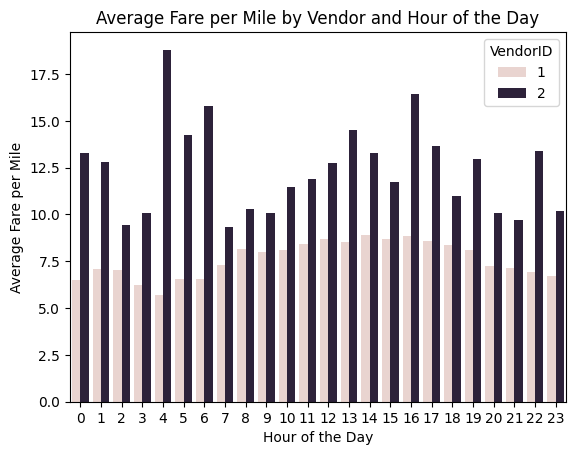

In [593]:
sns.barplot(x='hour', y='fare_per_mile', hue='VendorID', data=avg_fare_by_vendor_hour)
plt.title('Average Fare per Mile by Vendor and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



Average Fare per Mile by Vendor and Distance Category:
    VendorID  distance_category  fare_per_mile
0         1      Up to 2 miles       9.503342
1         1       2 to 5 miles       6.356915
2         1  More than 5 miles       4.449069
3         2      Up to 2 miles      17.063993
4         2       2 to 5 miles       6.522464
5         2  More than 5 miles       4.526373


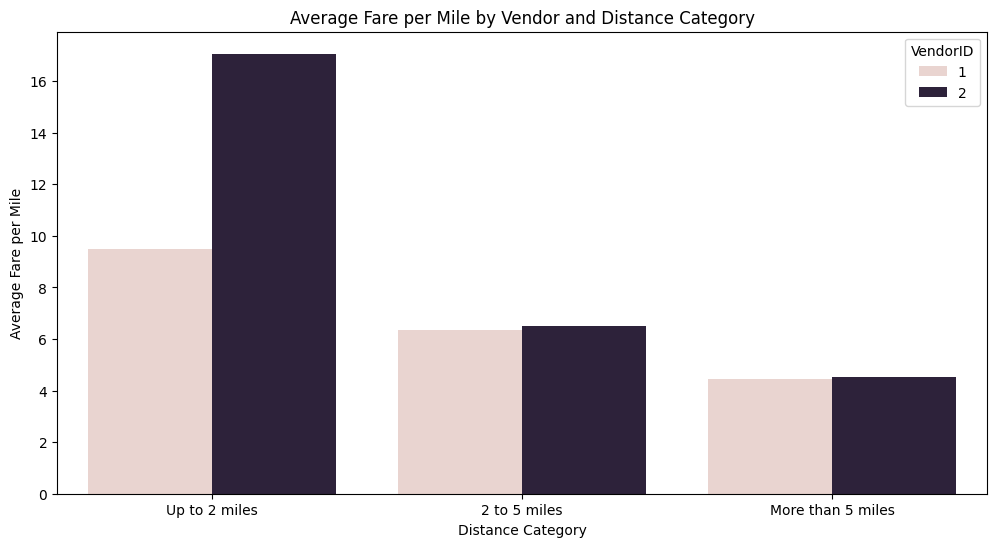

In [595]:
# Calculate fare per mile, handling zero distances
dfnew['fare_per_mile'] = dfnew.apply(lambda row: row['fare_amount'] / row['trip_distance'] if row['trip_distance'] != 0 else 0, axis=1)

# Create distance categories
dfnew['distance_category'] = pd.cut(dfnew['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'], include_lowest=True)

# Group by vendor and distance category, calculate average fare per mile
avg_fare_by_vendor_distance = dfnew.groupby(['VendorID', 'distance_category'])['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor and Distance Category:\n", avg_fare_by_vendor_distance)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='distance_category', y='fare_per_mile', hue='VendorID', data=avg_fare_by_vendor_distance)
plt.title('Average Fare per Mile by Vendor and Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Average Fare per Mile')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Average Tip Percentage by Trip Distance:
 trip_distance
Up to 2 miles        12.061366
2 to 5 miles         12.291150
More than 5 miles    11.488014
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
 passenger_count
1.0    12.153697
2.0    11.814063
3.0    11.344794
4.0    10.473558
5.0    12.330114
6.0    12.277842
Name: tip_percentage, dtype: float64

Average Tip Percentage by Pickup Hour:
 tpep_pickup_datetime
0     12.078971
1     12.168905
2     11.648937
3     11.295102
4      9.928062
5      9.867595
6     11.274133
7     11.811753
8     12.228662
9     11.992020
10    11.790274
11    11.763103
12    11.763569
13    11.766827
14    11.878574
15    11.758509
16    11.847572
17    12.229148
18    12.306798
19    12.269810
20    12.412481
21    12.624057
22    12.619771
23    12.194870
Name: tip_percentage, dtype: float64


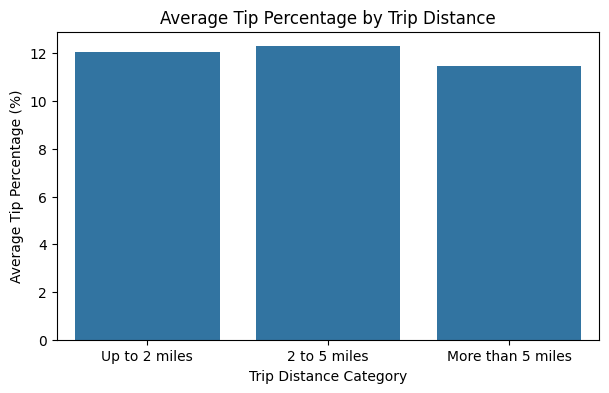

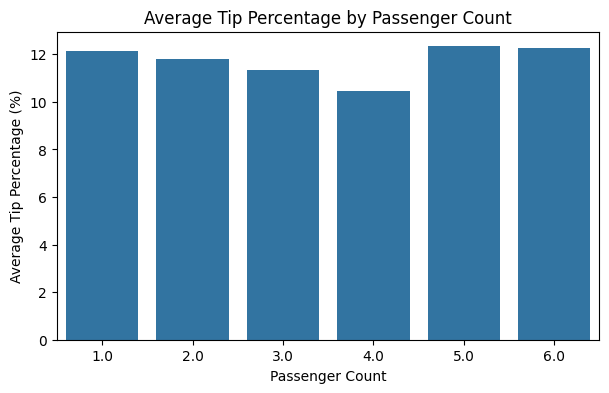

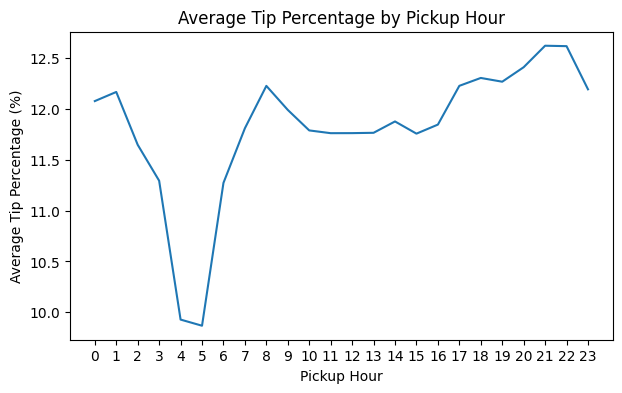

In [598]:


# Group by trip distance and calculate average tip percentage
avg_tip_by_distance = dfnew.groupby(pd.cut(dfnew['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'], include_lowest=True))['tip_percentage'].mean()
print("Average Tip Percentage by Trip Distance:\n", avg_tip_by_distance)

# Group by passenger count and calculate average tip percentage
avg_tip_by_passenger_count = dfnew.groupby('passenger_count')['tip_percentage'].mean()
print("\nAverage Tip Percentage by Passenger Count:\n", avg_tip_by_passenger_count)

# Group by pickup hour and calculate average tip percentage
avg_tip_by_pickup_hour = dfnew.groupby(dfnew['tpep_pickup_datetime'].dt.hour)['tip_percentage'].mean()
print("\nAverage Tip Percentage by Pickup Hour:\n", avg_tip_by_pickup_hour)

# Visualization for tip percentage by trip distance
plt.figure(figsize=(7, 4))
sns.barplot(x=avg_tip_by_distance.index, y=avg_tip_by_distance.values)
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance Category')
plt.ylabel('Average Tip Percentage (%)')
plt.show()

# Visualization for tip percentage by passenger count
plt.figure(figsize=(7,4))
sns.barplot(x=avg_tip_by_passenger_count.index, y=avg_tip_by_passenger_count.values)
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.show()

# Visualization for tip percentage by pickup hour
plt.figure(figsize=(7,4))
sns.lineplot(x=avg_tip_by_pickup_hour.index, y=avg_tip_by_pickup_hour.values)
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(range(24))  # Show all hours on x-axis
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



Low Tip Trips:
        trip_distance  passenger_count          hour   fare_amount  \
count   62753.000000     62753.000000  62753.000000  62753.000000   
mean        3.106807         1.423518     13.906650     18.823756   
std         3.994348         0.905473      5.757117     16.534970   
min         0.000000         1.000000      0.000000      0.010000   
25%         0.930000         1.000000     10.000000      8.600000   
50%         1.680000         1.000000     14.000000     13.500000   
75%         3.260000         2.000000     18.000000     21.900000   
max        47.700000         6.000000     23.000000    313.100000   

       total_amount  
count  62753.000000  
mean      24.018204  
std       18.038460  
min        1.010000  
25%       13.300000  
50%       18.200000  
75%       26.600000  
max      317.350000  

High Tip Trips:
        trip_distance  passenger_count          hour   fare_amount  \
count   14193.000000     14193.000000  14193.000000  14193.000000   
mean    

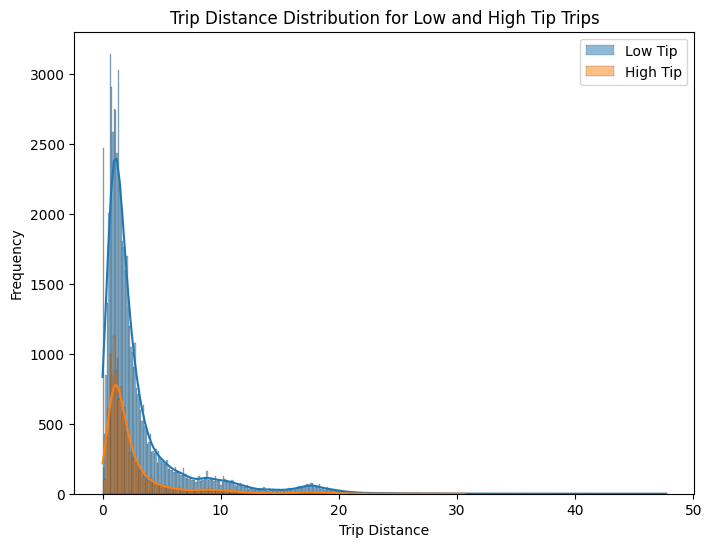

In [599]:
# 1. Define Low and High Tip Thresholds:
low_tip_threshold = 5  # Tip percentage below 5%
high_tip_threshold = 20 # Tip percentage above 20%

# 2. Create DataFrames for Low and High Tip Trips:
low_tip_trips = dfnew[dfnew['tip_percentage'] < low_tip_threshold]
high_tip_trips = dfnew[dfnew['tip_percentage'] > high_tip_threshold]

# 3. Compare Characteristics using Descriptive Statistics:
print("Low Tip Trips:\n", low_tip_trips[['trip_distance', 'passenger_count', 'hour', 'fare_amount', 'total_amount']].describe())
print("\nHigh Tip Trips:\n", high_tip_trips[['trip_distance', 'passenger_count', 'hour', 'fare_amount', 'total_amount']].describe())

# 4. Compare Distributions using Histograms or Box Plots:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Compare trip distance distributions
plt.figure(figsize=(8, 6))
sns.histplot(low_tip_trips['trip_distance'], label='Low Tip', kde=True)
sns.histplot(high_tip_trips['trip_distance'], label='High Tip', kde=True)
plt.title('Trip Distance Distribution for Low and High Tip Trips')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Similar plots can be created for other variables like passenger count, hour, fare amount, etc.

# 5. Further Analysis:
# - Group by relevant factors and compare average tip percentages between low and high tip groups
# - Use statistical tests (e.g., t-test) to determine if differences are significant

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




Average Passenger Count by Hour of the Day:
 tpep_pickup_datetime
0     1.403207
1     1.453574
2     1.431674
3     1.428374
4     1.359857
5     1.293068
6     1.238858
7     1.268719
8     1.297138
9     1.319478
10    1.358923
11    1.357727
12    1.367007
13    1.361126
14    1.382007
15    1.407110
16    1.394453
17    1.370266
18    1.373661
19    1.393846
20    1.396234
21    1.415761
22    1.439106
23    1.441347
Name: passenger_count, dtype: float64


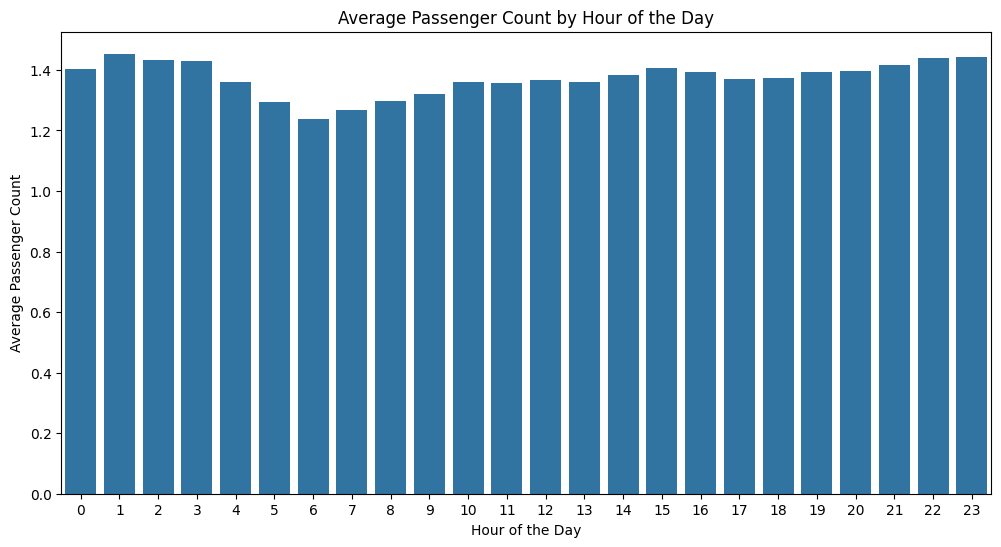

In [602]:
# Group by pickup hour and calculate average passenger count
avg_passenger_count_by_hour = dfnew.groupby(dfnew['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

print("Average Passenger Count by Hour of the Day:\n", avg_passenger_count_by_hour)

# Visualize the variation
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_passenger_count_by_hour.index, y=avg_passenger_count_by_hour.values)
plt.title('Average Passenger Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(24))  # Show all hours on x-axis
plt.show()


Average Passenger Count by Day of the Week:
 tpep_pickup_datetime
Friday       1.403110
Monday       1.351145
Saturday     1.468048
Sunday       1.458818
Thursday     1.335243
Tuesday      1.325530
Wednesday    1.324332
Name: passenger_count, dtype: float64


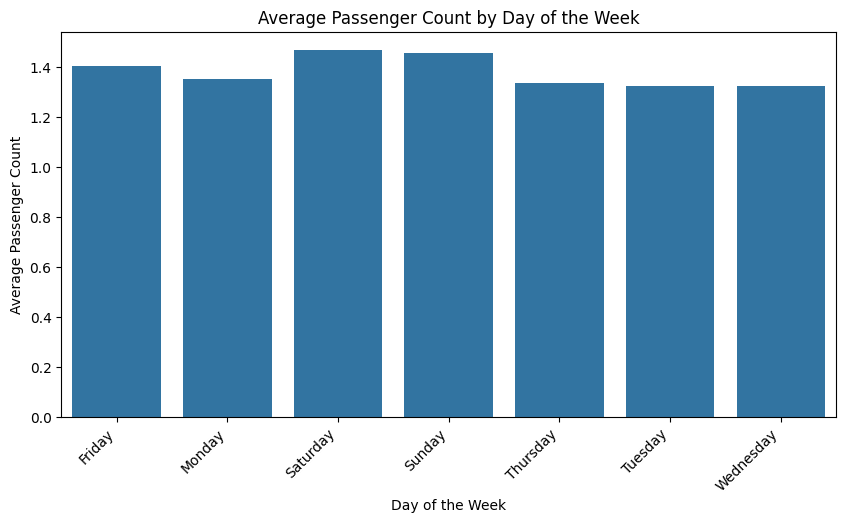

In [603]:
# Group by pickup day and calculate average passenger count
avg_passenger_count_by_day = dfnew.groupby(dfnew['tpep_pickup_datetime'].dt.day_name())['passenger_count'].mean()

print("\nAverage Passenger Count by Day of the Week:\n", avg_passenger_count_by_day)

# Visualize the variation
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_passenger_count_by_day.index, y=avg_passenger_count_by_day.values)
plt.title('Average Passenger Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [604]:
# How does passenger count vary across zones
# Group by pickup zone (PULocationID) and calculate average passenger count
avg_passenger_count_by_pickup_zone = dfnew.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zone data to get zone names
avg_passenger_count_by_pickup_zone = avg_passenger_count_by_pickup_zone.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

print("Average Passenger Count by Pickup Zone:\n", avg_passenger_count_by_pickup_zone[['zone', 'passenger_count']].sort_values(by='passenger_count', ascending=False))


Average Passenger Count by Pickup Zone:
                                 zone  passenger_count
225                    Willets Point         2.000000
3            Arrochar/Fort Wadsworth         2.000000
136  Marine Park/Floyd Bennett Field         2.000000
102                  Highbridge Park         2.000000
155                  Oakland Gardens         1.833333
..                               ...              ...
148               Morrisania/Melrose         1.000000
47                   Columbia Street         1.000000
146                          Midwood         1.000000
54                     Cypress Hills         1.000000
118              Kingsbridge Heights         1.000000

[236 rows x 2 columns]


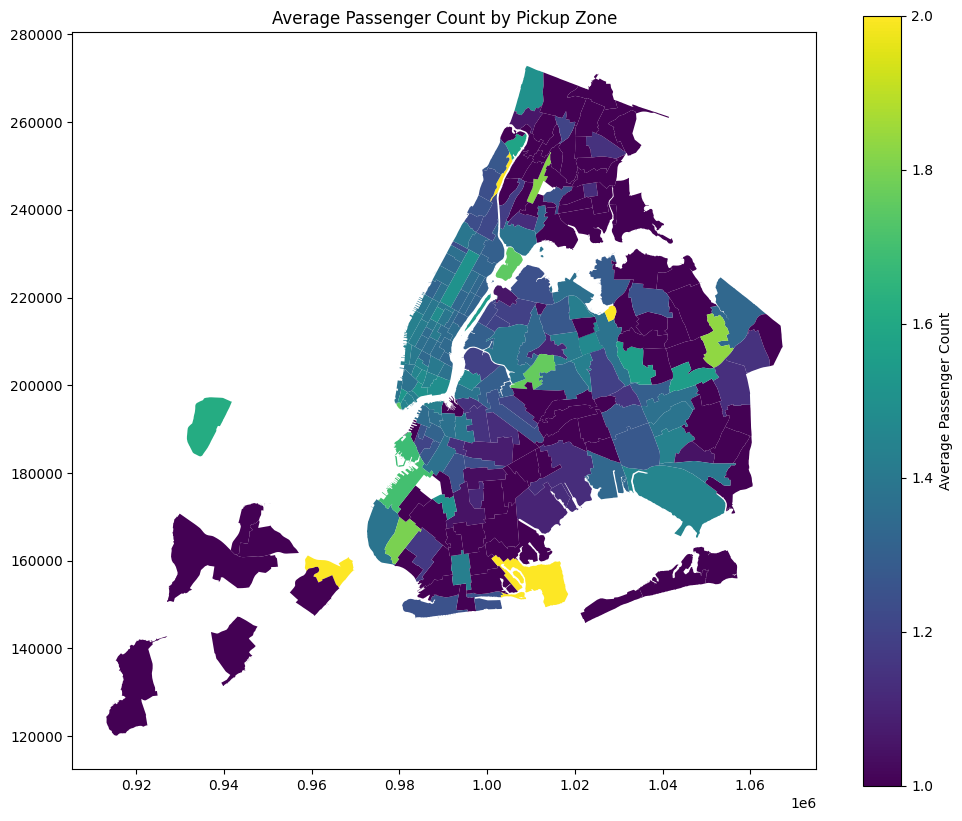

In [605]:
# Merge average passenger count data with GeoDataFrame
zone_map = zones.merge(avg_passenger_count_by_pickup_zone[['PULocationID', 'passenger_count']], left_on='LocationID', right_on='PULocationID', how='left')

# Create choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zone_map.plot(column='passenger_count', ax=ax, legend=True, legend_kwds={'label': "Average Passenger Count"}, cmap='viridis')
plt.title('Average Passenger Count by Pickup Zone')
plt.show()

In [608]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [609]:
# How often is each surcharge applied?

# Group by pickup zone and calculate the percentage of trips with extra charges
extra_charges_by_pickup_zone = dfnew.groupby('PULocationID')['extra'].apply(lambda x: (x > 0).mean() * 100).reset_index(name='extra_charge_percentage')

# Merge with zone data to get zone names
extra_charges_by_pickup_zone = extra_charges_by_pickup_zone.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

print("Percentage of Trips with Extra Charges by Pickup Zone:\n", extra_charges_by_pickup_zone[['zone', 'extra_charge_percentage']].sort_values(by='extra_charge_percentage', ascending=False).head(10))

# Repeat for dropoff zones (DOLocationID)
extra_charges_by_dropoff_zone = dfnew.groupby('DOLocationID')['extra'].apply(lambda x: (x > 0).mean() * 100).reset_index(name='extra_charge_percentage')
extra_charges_by_dropoff_zone = extra_charges_by_dropoff_zone.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')
print("\nPercentage of Trips with Extra Charges by Dropoff Zone:\n", extra_charges_by_dropoff_zone[['zone', 'extra_charge_percentage']].sort_values(by='extra_charge_percentage', ascending=False).head(10))


Percentage of Trips with Extra Charges by Pickup Zone:
                           zone  extra_charge_percentage
164              Port Richmond               100.000000
102            Highbridge Park               100.000000
213         Van Cortlandt Park               100.000000
120          LaGuardia Airport                98.832418
227  Williamsburg (North Side)                89.855072
130            Lower East Side                84.115921
61               East Elmhurst                82.899306
2                Alphabet City                81.040892
98     Greenwich Village South                80.022510
70                East Village                77.753510

Percentage of Trips with Extra Charges by Dropoff Zone:
                           zone  extra_charge_percentage
195  Saint George/New Brighton               100.000000
56                         NaN               100.000000
177              Port Richmond               100.000000
58                Crotona Park               1

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Recommendations for Optimizing Taxi Operations:

1. Meeting Customer Demand:

Dynamic Pricing: Implement dynamic pricing strategies that adjust fares based on real-time demand, time of day, and zone. Consider surge pricing during peak hours and in high-demand zones to incentivize drivers and balance supply with demand.
Zone-Based Dispatching: Prioritize dispatching taxis to high-demand zones during peak hours to minimize passenger wait times and maximize revenue.
Fleet Management: Adjust the size of the active taxi fleet based on predicted demand patterns for different hours, days, and zones. Increase the number of active taxis during peak demand periods and reduce it during slower periods to optimize resource allocation.
2. Optimizing Routing and Dispatching:

Route Optimization: Develop routing algorithms that consider real-time traffic conditions and historical demand patterns to identify the fastest and most efficient routes.
Traffic Management: Collaborate with city authorities to address traffic bottlenecks and congestion issues in high-demand zones. Advocate for dedicated taxi lanes or traffic signal optimization to improve taxi flow.
Predictive Dispatching: Implement predictive dispatching systems that anticipate future demand based on historical data, weather forecasts, and special events. This can help proactively position taxis in areas where they are most likely to be needed.
3. Enhancing Passenger Experience:

Wait Time Reduction: Utilize real-time data and predictive modeling to minimize passenger wait times. Implement ride-sharing options during peak hours to increase capacity and reduce individual wait times.
Improved Communication: Provide passengers with real-time updates on taxi availability, estimated arrival times, and fare estimates. Develop a mobile app that allows passengers to easily book rides, track their taxis, and provide feedback.
Personalized Service: Leverage data on passenger preferences and trip history to offer personalized recommendations and promotions. Consider loyalty programs or reward systems to enhance customer retention.
4. Addressing Operational Inefficiencies:

Driver Incentives: Offer incentives to drivers to operate during less popular hours or in low-demand zones. This can help ensure adequate taxi coverage across the city.
Fuel Efficiency: Implement strategies to improve fuel efficiency, such as route optimization, driver training on eco-driving techniques, and the use of hybrid or electric vehicles.
Data-Driven Decision Making: Continuously monitor and analyze operational data to identify areas for improvement. Use data to inform decisions about fleet management, pricing, routing, and dispatching to optimize efficiency and profitability.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Prioritize High-Demand Zones:

Peak Hours: During peak hours (e.g., weekday rush hours, weekend evenings), position a higher concentration of cabs in zones with historically high demand. This ensures that taxis are readily available in areas where they are most needed, minimizing passenger wait times and maximizing revenue potential.
Busiest Days: On weekdays, especially Thursdays and Fridays, allocate more taxis to zones with higher pickup activity. Consider adjusting the allocation based on the specific hourly demand patterns for each zone.
Seasonal Adjustments: During warmer months or periods with increased tourism, increase the taxi presence in popular tourist destinations and entertainment districts. During slower periods, such as winter months, adjust the allocation to match the lower demand.
2. Address Pickup/Dropoff Imbalances:

High Pickup Zones: For zones with significantly higher pickup activity compared to dropoffs, proactively dispatch taxis from nearby zones to replenish the supply. This helps maintain a balance and prevents excessive wait times for passengers in these areas.
High Dropoff Zones: In zones with higher dropoff activity, encourage drivers to remain in the area or strategically reposition themselves to nearby zones with anticipated pickup demand. This minimizes empty trips and improves driver efficiency.
3. Leverage Predictive Modeling:

Forecasting Demand: Utilize predictive modeling techniques to forecast future demand based on historical data, weather forecasts, special events, and other relevant factors. This allows you to proactively position cabs in zones where demand is expected to be high, even before it materializes.
Dynamic Allocation: Develop a dynamic allocation system that automatically adjusts the number of taxis in each zone based on real-time demand and predicted future demand. This ensures that taxis are efficiently distributed across the city to meet fluctuating passenger needs.
4. Consider Operational Efficiency:

Minimize Empty Trips: Encourage drivers to avoid deadheading (driving without passengers) by suggesting routes or zones with anticipated pickup demand. Utilize ride-sharing options during peak hours to increase capacity and reduce empty trips.
Traffic Awareness: Equip drivers with real-time traffic information and navigation tools to help them avoid congested areas and choose the most efficient routes.
Driver Incentives: Offer incentives to drivers to operate in less popular zones or during off-peak hours. This can help ensure adequate taxi coverage across the city and minimize wait times for passengers in all areas.
5. Collaborate with City Authorities:

Data Sharing: Share your demand data and insights with city authorities to inform transportation planning and infrastructure improvements. This can lead to the development of solutions like dedicated taxi lanes, traffic signal optimization, or ride-sharing initiatives that benefit both taxi operations and the overall transportation system.
Policy Advocacy: Advocate for policies that support the taxi industry and address challenges like unfair competition from ride-hailing services or outdated regulations. This can help create a more level playing field and ensure the long-term viability of taxi operations.
Example: Airport Strategy

Based on the analysis, airports are likely to be high-demand zones with significant pickup activity. To optimize taxi operations at airports, consider the following strategies:

Dedicated Airport Fleet: Maintain a dedicated fleet of taxis specifically assigned to airport pickups. This ensures a consistent and reliable supply of taxis for arriving passengers.
Queue Management: Implement a queue management system to efficiently organize taxis and minimize passenger wait times. Utilize technology to track taxi availability and dispatch taxis based on real-time demand.
Fare Transparency: Clearly communicate airport fares and any applicable surcharges to passengers to avoid disputes and ensure a positive customer experience.
Collaboration with Airport Authorities: Work closely with airport authorities to coordinate taxi operations and ensure smooth passenger flow.
By strategically positioning cabs across different zones based on the insights uncovered by analyzing trip trends, your taxi operation can effectively meet customer demand, optimize supply, enhance passenger experience, and achieve operational efficiency

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.


1. Dynamic Pricing:

Peak Hours: Implement surge pricing during peak demand hours (e.g., weekday rush hours, weekend evenings) and in high-demand zones. This allows you to capture increased willingness to pay during these periods while ensuring that fares remain competitive during off-peak times.
Zone-Based Pricing: Adjust fares based on the pickup and dropoff zones. Consider charging higher fares for trips originating or ending in zones with consistently high demand or longer average trip distances. This reflects the higher value of service in these areas.
Real-Time Adjustments: Utilize real-time data on demand, traffic conditions, and competitor pricing to dynamically adjust fares. This allows you to respond quickly to changing market conditions and optimize revenue potential.
2. Trip Distance and Duration:

Distance-Based Fares: Implement a fare structure that incorporates trip distance as a primary factor. Longer trips should have higher fares to reflect the increased cost of service and driver time.
Duration-Based Adjustments: Consider adding a time-based component to the fare calculation, especially for trips that encounter significant traffic delays. This ensures that drivers are fairly compensated for their time and that fares accurately reflect the actual cost of the trip.
3. Passenger Count:

Group Discounts: Offer discounts for group rides or shared rides to incentivize higher passenger counts and increase revenue per trip. This can be particularly effective during off-peak hours or in zones with lower demand.
Passenger Surcharges: Consider implementing a small surcharge for trips with a higher number of passengers, reflecting the increased wear and tear on the vehicle and the potential for longer loading/unloading times.
4. Special Event Pricing:

Event-Based Surcharges: During special events like concerts, sporting events, or holidays, implement temporary surcharges to capture increased demand and willingness to pay. Clearly communicate these surcharges to passengers in advance.
Pre-Booking Discounts: Offer discounts for passengers who pre-book rides for special events, allowing you to better manage demand and ensure adequate taxi availability.
5. Competitive Benchmarking:

Monitor Competitor Pricing: Regularly monitor the pricing strategies of other taxi and ride-hailing services operating in your area. Adjust your fares to remain competitive while maximizing revenue potential.
Value Proposition: Clearly define your value proposition and differentiate your service based on factors like reliability, safety, or passenger experience. This can justify premium pricing in certain segments or for specific services.
6. Data Analysis and Optimization:

A/B Testing: Conduct A/B testing to experiment with different pricing strategies and measure their impact on revenue and passenger demand. This allows you to identify the most effective pricing models for different scenarios.
Continuous Monitoring: Regularly monitor and analyze pricing data to identify trends, anomalies, and opportunities for optimization. Adjust your pricing strategy as needed to maximize revenue and maintain competitiveness.
7. Transparency and Communication:

Clear Fare Structure: Clearly communicate your fare structure to passengers, including any surcharges, discounts, or dynamic pricing adjustments. This builds trust and avoids potential disputes.
In-App Fare Estimates: Provide passengers with upfront fare estimates before they book a ride, allowing them to make informed decisions.
Real-Time Fare Updates: If using dynamic pricing, inform passengers of any fare changes in real-time to maintain transparency and manage expectations.
By implementing these data-driven pricing adjustments, your taxi operation can maximize revenue while maintaining competitive rates and providing a positive passenger experience.

Important Considerations:

Market Dynamics: Regularly assess market conditions and competitor behavior to ensure that your pricing strategy remains relevant and effective.
Regulatory Compliance: Ensure that your pricing practices comply with all applicable regulations and licensing requirements.
Passenger Feedback: Gather passenger feedback on pricing and service to identify areas for improvement and ensure customer satisfaction.
Driver Satisfaction: Consider the impact of pricing adjustments on driver earnings and satisfaction. Maintain a balance between maximizing revenue and ensuring fair compensation for drivers.